In [1]:
import pandas as pd
import numpy as np

In [2]:
from src.NF_Cos_dist import JaxNormFlow
import jax.random as jr
flow=JaxNormFlow()


/opt/homebrew/Caskroom/miniforge/base/envs/flowjax/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
pd.read_csv('../Data/data_full_ps_2.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../Data/data_full_ps_2.csv'

In [5]:
flow.data.shape[0]//32

40158

In [ ]:
from astropy.io import fits
file=fits.open('/Users/mattocallaghan/XPNorm/Data/ebv_lhd.hpx.fits')
file[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                    4 / length of dimension 1                          
NAXIS2  =             12582912 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    1 / number of table fields                         
PIXTYPE = 'HEALPIX '           / HEALPIX pixelisation                           
ORDERING= 'RING    '           / Pixel ordering scheme, either RING or NESTED   
COORDSYS= 'Galactic'           / Ecliptic, Galactic or Celestial (equatorial)   
EXTNAME = 'xtension'           / name of this binary table extension            
NSIDE   =                 10

In [ ]:
ebv_map

array([0.00892611, 0.00903893, 0.00909479, ..., 0.01552308, 0.01594147,
       0.01596942], dtype=float32)

In [ ]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u
ebv_map = hp.read_map('/Users/mattocallaghan/XPNorm/Data/ebv_lhd.hpx.fits', verbose=False)
#hp.mollview((ebv_map), title='', unit='log(E(B-V) [mag])')
#hp.graticule()
nside = hp.get_nside(ebv_map)
npix = hp.nside2npix(nside)
ordering = 'ring'
pixel_indices = np.arange(npix)

# Get the pixel centers
l, b = hp.pix2ang(nside, pixel_indices,lonlat=True)


idx=np.argwhere((~np.isnan(ebv_map))*(ebv_map<0.008))

coords = SkyCoord(l=l*u.degree, b=b*u.degree, frame='galactic')
ra=coords.icrs.ra.degree
dec=coords.icrs.dec.degree
places=np.stack((ra[idx],dec[idx]),1)


ModuleNotFoundError: No module named 'healpy'

In [4]:
import pandas as pd
df=pd.read_csv('/Users/mattocallaghan/XPNorm/Data/data_full_ps_1')

In [5]:
len(df)

1285056

In [6]:
final_bprp=df
#final_bprp = final_bprp.drop_duplicates(subset=['source_id'])

In [ ]:
len(final_bprp)/10000

128.5056

In [ ]:
final_bprp=final_bprp[final_bprp['ruwe']<=1.4].reset_index(drop=True)
final_bprp=final_bprp[final_bprp['phot_bp_mean_mag']<22].reset_index(drop=True)
final_bprp=final_bprp[final_bprp['phot_rp_mean_mag']<22].reset_index(drop=True)
final_bprp=final_bprp[final_bprp['phot_g_mean_mag']<19].reset_index(drop=True)
final_bprp=final_bprp[final_bprp['phot_bp_mean_mag']<19].reset_index(drop=True) #check lallement et al




KeyError: 'ruwe'

In [7]:
final_bprp['bprp']=final_bprp['phot_bp_mean_mag']-final_bprp['phot_rp_mean_mag']

final_bprp['g']=-final_bprp['mu']+final_bprp['phot_g_mean_mag']



In [19]:
from src.NF_Jax import JaxNormFlow

In [20]:
j=JaxNormFlow()

(12, 12)


In [21]:
real=j.data#*j.std+j.mean

In [22]:
import jax.numpy as jnp
import jax.random as jr
samples=j.flow.sample(jr.PRNGKey(0),sample_shape=(150000,))
samples=samples+j.mean#*j.std
real=j.data+j.mean#*j.std+j.mean

In [30]:
j.data[:,0]/(j.b)

AttributeError: 'JaxNormFlow' object has no attribute 'b'

In [23]:
len(real)//32

40158

In [24]:
real.shape

(1285056, 11)

In [ ]:
len

<function len(obj, /)>

In [25]:
real=real[:len(real)//8]

In [26]:
len(real)

160632

<Figure size 1800x900 with 0 Axes>

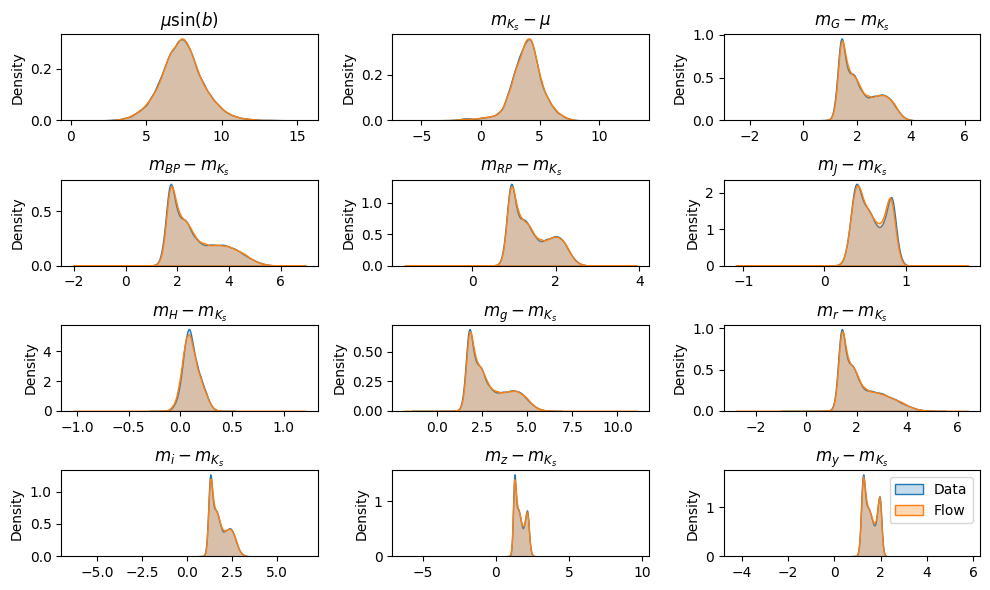

In [11]:
import seaborn as sn
import matplotlib.pyplot as plt
x=samples
plt.figure(figsize=(18, 9))  # Adjust the figure size as needed for your paper layout
fig,axes=plt.subplots(4,3)
axes=axes.flatten()
fig.set_figheight(6)
fig.set_figwidth(10)
sn.kdeplot((real[:,0]),label='Data',ax=axes[0],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,0],label='Flow',ax=axes[0],fill=True,alpha=0.3)

sn.kdeplot(real[:,1],label='Data',ax=axes[1],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,1],label='Flow',ax=axes[1],fill=True,alpha=0.3)

sn.kdeplot(real[:,2],label='Data',ax=axes[2],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,2],label='Flow',ax=axes[2],fill=True,alpha=0.3)

sn.kdeplot(real[:,3],label='Data',ax=axes[3],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,3],label='Flow',ax=axes[3],fill=True,alpha=0.3)

sn.kdeplot(real[:,4],label='Data',ax=axes[4],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,4],label='Flow',ax=axes[4],fill=True,alpha=0.3)

sn.kdeplot(real[:,5],label='Data',ax=axes[5],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,5],label='Flow',ax=axes[5],fill=True,alpha=0.3)

sn.kdeplot((real[:,6]),label='Data',ax=axes[6],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,6],label='Flow',ax=axes[6],fill=True,alpha=0.3)

sn.kdeplot(real[:,7],label='Data',ax=axes[7],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,7],label='Flow',ax=axes[7],fill=True,alpha=0.3)

sn.kdeplot(real[:,8],label='Data',ax=axes[8],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,8],label='Flow',ax=axes[8],fill=True,alpha=0.3)

sn.kdeplot(real[:,9],label='Data',ax=axes[9],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,9],label='Flow',ax=axes[9],fill=True,alpha=0.3)

sn.kdeplot(real[:,10],label='Data',ax=axes[10],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,10],label='Flow',ax=axes[10],fill=True,alpha=0.3)

sn.kdeplot(real[:,11],label='Data',ax=axes[11],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,11],label='Flow',ax=axes[11],fill=True,alpha=0.3)


#sn.kdeplot(nf.data[:,6]+nf.mean[6],label='Data',ax=axes[6],fill=True)  # Adjust the colormap as needed
#sn.kdeplot(x[:,6],label='Flow',ax=axes[6],fill=True,alpha=0.3)

#sn.kdeplot(nf.data[:,3]+nf.mean[3]-(nf.data[:,2]+nf.mean[2]),label='Data',ax=axes[7],fill=True)  # Adjust the colormap as needed
#sn.kdeplot(x[:,3]-x[:,2],label='Flow',ax=axes[7],fill=True,alpha=0.3)

#sn.kdeplot(nf.data[:,-1]+nf.mean[-1]+(nf.data[:,1]+nf.mean[1]),label='Data',ax=axes[8],fill=True)  # Adjust the colormap as needed
#sn.kdeplot(x[:,-1]+x[:,1],label='Flow',ax=axes[8],fill=True,alpha=0.3)

#axes[0].set_title('$\mu$', fontsize=12)  # Adjust the label and font size as needed
axes[0].set_title('$\mu \sin(b)$', fontsize=12)  # Adjust the label and font size as needed

axes[0+1].set_title('$m_{K_s}-\mu$', fontsize=12)  # Adjust the label and font size as needed
axes[1+1].set_title('$m_{G}-m_{K_s}$', fontsize=12)  # Adjust the label and font size as needed
axes[2+1].set_title('$m_{BP}-m_{K_s}$', fontsize=12)  # Adjust the label and font size as needed
axes[3+1].set_title('$m_{RP}-m_{K_s}$', fontsize=12)  # Adjust the label and font size as needed
axes[4+1].set_title('$m_{J}-m_{K_s}$', fontsize=12)  # Adjust the label and font size as needed
axes[5+1].set_title('$m_{H}-m_{K_s}$', fontsize=12)  # Adjust the label and font size as needed
axes[6+1].set_title('$m_{g}-m_{K_s}$', fontsize=12)  # Adjust the label and font size as needed
axes[7+1].set_title('$m_{r}-m_{K_s}$', fontsize=12)  # Adjust the label and font size as needed
axes[8+1].set_title('$m_{i}-m_{K_s}$', fontsize=12)  # Adjust the label and font size as needed
axes[9+1].set_title('$m_{z}-m_{K_s}$', fontsize=12)  # Adjust the label and font size as needed
axes[10+1].set_title('$m_{y}-m_{K_s}$', fontsize=12)  # Adjust the label and font size as needed

#axes[7].set_title('$m_{BP}-m_{RP}$', fontsize=12)  # Adjust the label and font size as needed
#axes[8].set_title('$m_{K}-\mu$', fontsize=12)  # Adjust the label and font size as needed

plt.legend()
# Adding a colorbar for better interpretation of the histogram
#cbar = plt.colorbar()
#cbar.set_label('N Stars', fontsize=12)  # Adjust the label and font size as needed
plt.tight_layout()
# Saving the plot
plt.savefig('/Users/mattocallaghan/XPNorm/Plots/par_compare.png', bbox_inches='tight')  # Adjust filename and DPI as needed
plt.savefig('/Users/mattocallaghan/XPNorm/Plots/par_compare.pdf', bbox_inches='tight')  # Adjust filename and DPI as needed

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 500x600 with 0 Axes>

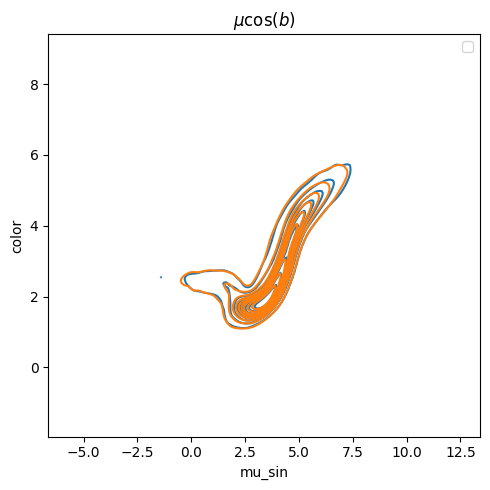

In [27]:
import seaborn as sn
import matplotlib.pyplot as plt
x=samples
plt.figure(figsize=(5, 6))  # Adjust the figure size as needed for your paper layout
fig,axes=plt.subplots(1,1)
axes=[axes]#.flatten()
fig.set_figheight(5)
fig.set_figwidth(5)
sn.kdeplot(pd.DataFrame({'mu_sin':real[:,0],'color':real[:,6]}),x='mu_sin',y='color',label='Data',ax=axes[0],fill=False)  # Adjust the colormap as needed
sn.kdeplot(pd.DataFrame({'mu_sin':samples[:,0],'color':samples[:,6]}),x='mu_sin',y='color',label='Data',ax=axes[0],fill=False)  # Adjust the colormap as needed




#sn.kdeplot(nf.data[:,6]+nf.mean[6],label='Data',ax=axes[6],fill=True)  # Adjust the colormap as needed
#sn.kdeplot(x[:,6],label='Flow',ax=axes[6],fill=True,alpha=0.3)

#sn.kdeplot(nf.data[:,3]+nf.mean[3]-(nf.data[:,2]+nf.mean[2]),label='Data',ax=axes[7],fill=True)  # Adjust the colormap as needed
#sn.kdeplot(x[:,3]-x[:,2],label='Flow',ax=axes[7],fill=True,alpha=0.3)

#sn.kdeplot(nf.data[:,-1]+nf.mean[-1]+(nf.data[:,1]+nf.mean[1]),label='Data',ax=axes[8],fill=True)  # Adjust the colormap as needed
#sn.kdeplot(x[:,-1]+x[:,1],label='Flow',ax=axes[8],fill=True,alpha=0.3)

#axes[0].set_title('$\mu$', fontsize=12)  # Adjust the label and font size as needed
axes[0].set_title('$\mu \cos(b)$', fontsize=12)  # Adjust the label and font size as needed


#axes[7].set_title('$m_{BP}-m_{RP}$', fontsize=12)  # Adjust the label and font size as needed
#axes[8].set_title('$m_{K}-\mu$', fontsize=12)  # Adjust the label and font size as needed

plt.legend()
# Adding a colorbar for better interpretation of the histogram
#cbar = plt.colorbar()
#cbar.set_label('N Stars', fontsize=12)  # Adjust the label and font size as needed
plt.tight_layout()
# Saving the plot
plt.savefig('/Users/mattocallaghan/XPNorm/Plots/joint_compare.png', bbox_inches='tight')  # Adjust filename and DPI as needed
plt.savefig('/Users/mattocallaghan/XPNorm/Plots/joint_compare.pdf', bbox_inches='tight')  # Adjust filename and DPI as needed

plt.show()

In [30]:
real[:, -1].max()

Array(4.9991865, dtype=float32)

In [ ]:
import numpy as np
import normflows as nf
from matplotlib import pyplot as plt
from tqdm import tqdm
import jax
import pandas as pd
import os
import matplotlib.pyplot as plt
from jax import grad,vmap
from jax import jacfwd, jacrev
from numpyro.infer import SVI, Trace_ELBO
import numpyro.optim as optim
from numpyro.infer import (
MCMC, NUTS, SVI, autoguide,
Trace_ELBO, Predictive, autoguide)
from torch import nn
import jax.numpy as jnp
import jax.random as jr
import matplotlib.pyplot as plt
from flowjax.bijections import RationalQuadraticSpline
from flowjax.distributions import Normal
from flowjax.flows import masked_autoregressive_flow
from src.jax_to_numpyro import distribution_to_numpyro
from src.NF_Cos_dist import JaxNormFlow
from numpyro.infer import MCMC, NUTS
import numpyro.distributions as dist
import numpyro
from jax import random, hessian

from numpyro.infer import MCMC, NUTS, SA, HMC
from numpyro import handlers
import equinox as eqx
import jax.numpy as jnp
from jax import random, jit

from astropy.coordinates import SkyCoord
import astropy.units as u


# Load saved parameters from PyTorch


# Compile JAX function
'''
HMC 

'''

############################################################################# 
###################### FILE LOCATIONS #######################################
#############################################################################

#directory for the pheonix spectra
data_file='/Users/mattocallaghan/XPNorm/Data/data_full_ps_1'
test_file='/Users/mattocallaghan/XPNorm/Data/data_noext_ps_1'
test_file='/Users/mattocallaghan/XPNorm/Data/data_black_ps_1'
#test_file='/Users/mattocallaghan/XPNorm/Data/data_red_1'
#test_file='/Users/mattocallaghan/XPNorm/Data/data_black_circle'

#test_file='/Users/mattocallaghan/XPNorm/Data/data_red_circle'
#test_file='/Users/mattocallaghan/XPNorm/Data/data_black_circle_20'
#test_file='/Users/mattocallaghan/XPNorm/Data/data_noext'

err_file='/Users/mattocallaghan/XPNorm/Data/err_black_ps_1'

#err_file='/Users/mattocallaghan/XPNorm/Data/err_noext_ps_1'




class HMC_Sampler():
    def __init__(self,csv_location=data_file,resample=32,*args, **kwargs):


        '''
Learning the extinction map

        '''
#############################################################################
###################### DATA IMPORT #######################################
#############################################################################

        normalising_flow=JaxNormFlow()

        dist_nf=distribution_to_numpyro(normalising_flow.flow)

        #data=pd.read_csv(csv_location)[['mu','phot_g_mean_mag','phot_bp_mean_mag','phot_rp_mean_mag','j_m','h_m','ks_m']].values

        data_test=pd.read_csv(test_file)[['mu','phot_g_mean_mag','phot_bp_mean_mag','phot_rp_mean_mag','j_m','h_m','g_mean_psf_mag', 'r_mean_psf_mag', 'i_mean_psf_mag', 'z_mean_psf_mag', 'y_mean_psf_mag','ks_m']].values

        data_err=pd.read_csv(err_file)[['mu_error','g_error','bp_error','rp_error','j_msigcom','h_msigcom','g_mean_psf_mag_error', 'r_mean_psf_mag_error', 'i_mean_psf_mag_error', 'z_mean_psf_mag_error', 'y_mean_psf_mag_error','ks_msigcom']].values


        b=pd.read_csv(test_file)[['ra','dec']]
        galactic_coord = SkyCoord(ra=b['ra'].values*u.degree, dec=self.b['dec'].values*u.degree, frame='icrs')
        galactic_coord = galactic_coord.transform_to('galactic')
        self.l=galactic_coord.l.value
        b=galactic_coord.b.value



        self.data_transform=jnp.array([
                                [1., 0., 0., 0., 0., 0.,0,0,0,0,0,0],
                                [-1., 0., 0., 0., 0.,0,0,0,0,0, 0.,1],
                                [0., 1., 0., 0., 0.,0,0,0,0,0, 0.,-1],
                                [0., 0., 1., 0.,0,0,0,0,0, 0., 0.,-1],
                                [0., 0., 0., 1., 0,0,0,0,0,0., 0.,-1],
                                [0., 0., 0., 0., 1., 0,0,0,0,0,0.,-1],
                                [0., 0., 0., 0., 0., 1,0,0,0,0,0,-1],
                                [0., 0., 0., 0., 0., 0,1,0,0,0,0,-1],
                                [0., 0., 0., 0., 0., 0,0,1,0,0,0,-1],
                                [0., 0., 0., 0., 0., 0,0,0,1,0,0,-1],
                                [0., 0., 0., 0., 0., 0,0,0,0,1,0,-1],
                                [0., 0., 0., 0., 0., 0,0,0,0,0,1,-1]])
        

        self.data=jnp.einsum('ij,bj->bi',jnp.array(self.data_transform),jnp.array(self.data_test))
        self.error=jnp.stack([jnp.diag(arr)**2 for arr in self.data_err])
        # DOES THIS NEED TOBE ERR SQUARED
        self.error=self.error.at[:,0,0].set(self.error[:,0,0]*(jnp.abs(jnp.sin(jnp.radians(self.b))**2)))

        #self.error=jnp.stack([jnp.eye(7) for arr in self.data_err])
        self.error=(jnp.einsum('ik,bkj->bij',(jnp.array(self.data_transform)),self.error))

        self.error=(jnp.einsum('bik,kj->bij',self.error,jnp.array(self.data_transform).transpose()))
        #self.data=self.data[(self.data[:,1]<10)*(self.data[:,1]>-2)]
        #self.data=self.data[(self.data[:,0]<20)]#*(self.data[:,0]>2)]
        self.distance=10**((self.data[:,0]+5)/5)
        self.data = self.data.at[:,0].set(self.data[:,0]*jnp.abs(jnp.sin(jnp.radians(self.b))))
        self.mean=jnp.mean(self.data,axis=0)
        self.std=jnp.std(self.data,axis=0)
        self.data=(self.data-self.normalising_flow.mean)


#############################################################################
###################### Extinction Law #######################################
#############################################################################

        data_file='/Users/mattocallaghan/XPNorm/Data/exts.npy'
        data_file_2='/Users/mattocallaghan/XPNorm/Data/vals.npy'

        teff=np.arange(3500,10000,100)
        logg=np.arange(0,5,0.15)
        feh=np.arange(-3,0.5,0.5)
        #Rv=np.arange(1,5,0.2)
        av=np.arange(0.001,5,0.1)

        mesh=np.meshgrid(teff,logg,feh,av)
        teff=mesh[0].flatten()[:,None]
        logg=mesh[1].flatten()[:,None]
        feh=mesh[2].flatten()[:,None]
        av=mesh[3].flatten()[:,None]
        columns = ['teff','feh','logg','av',"a_Gaia_G_EDR3", "a_Gaia_BP_EDR3", 'a_Gaia_RP_EDR3','a_2MASS_J','a_2MASS_H','a_2MASS_Ks','a_WISE_W1','a_WISE_W2','a_PS_g','a_PS_i','a_PS_r','a_PS_y','a_PS_z',"Gaia_G_EDR3", "Gaia_BP_EDR3", 'Gaia_RP_EDR3','2MASS_J','2MASS_H','2MASS_Ks','WISE_W1','WISE_W2','PS_g','PS_i','PS_r','PS_y','PS_z'] #add wise on later.
        self.data_extinction=pd.DataFrame(np.concatenate((teff,logg,feh,av,np.load(data_file),np.load(data_file_2)),1),columns=columns)
        self.data_extinction=self.data_extinction[['av',"Gaia_G_EDR3", "Gaia_BP_EDR3", 'Gaia_RP_EDR3','2MASS_J','2MASS_H','2MASS_Ks','PS_g','PS_i','PS_r','PS_y','PS_z',"a_Gaia_G_EDR3", "a_Gaia_BP_EDR3", 'a_Gaia_RP_EDR3','a_2MASS_J','a_2MASS_H','a_2MASS_Ks','a_PS_g','a_PS_i','a_PS_r','a_PS_y','a_PS_z']].dropna()

        self.data_extinction[["k_Gaia_G_EDR3", "k_Gaia_BP_EDR3", 'k_Gaia_RP_EDR3','k_2MASS_J','k_2MASS_H','k_2MASS_Ks','k_PS_g','k_PS_i','k_PS_r','k_PS_y','k_PS_z']]=(self.data_extinction[["a_Gaia_G_EDR3", "a_Gaia_BP_EDR3", 'a_Gaia_RP_EDR3','a_2MASS_J','a_2MASS_H','a_2MASS_Ks','a_PS_g','a_PS_i','a_PS_r','a_PS_y','a_PS_z']].values)/self.data_extinction['av'].values[:,None]
        self.data_extinction['GK']=self.data_extinction['Gaia_G_EDR3']-self.data_extinction['2MASS_Ks']
        self.data_extinction['RPK']=self.data_extinction['Gaia_RP_EDR3']-self.data_extinction['2MASS_Ks']
        self.data_extinction=self.data_extinction[['av',"GK","RPK","k_Gaia_G_EDR3", "k_Gaia_BP_EDR3", 'k_Gaia_RP_EDR3','k_2MASS_J','k_2MASS_H','k_2MASS_Ks','k_PS_g','k_PS_i','k_PS_r','k_PS_y','k_PS_z']].dropna().values


        self.coeffs= jnp.array([
        [0.194059063720102, -0.000337880688254366, 0.000405004510990789, -0.000119030825664077, -2.90629429374213e-05, 9.85596051245887e-09, 1.22296149043372e-10, 0, 0, 0],
        [0.255058871064972, 7.19016588950228e-05, -0.000250455702483274, 3.99422163967702e-05, -6.83632867675118e-05, -2.3163568526324e-09, 7.26631781961228e-10, -2.27788077229475e-07, 4.97609167483581e-07, 6.67076034469308e-09],
        [0.340301468237771, -0.000826269158576803, -0.000283696380615497, 0.000103538996307887, -0.000156039957793959, 1.81587525109325e-07, 2.33928990111011e-09, 1.63733498839871e-06, 5.71693287820809e-08, 2.954302715354e-08],
        [0.663374149569189, -0.0184814428792349, 0.0100266536020118, -0.00317119320308867, -0.00649336268398495, 3.27674122186053e-05, 1.57894227641494e-06, -0.000116290469708794, 0.000117366662432525, 6.91273258513903e-06],
        [1.1516008149802, -0.0502982507379423, -0.00801054248601918, 0.0028487377407222, -0.0222045923218139, 0.000841943191161668, -1.31018008013547e-05, 0.00346423295251231, -0.000145621334026214, -6.85718568409361e-05],
        [0.993548688906439, -0.110149052160837, 0.0264447715065468, -0.00571010222810317, -0.0374363031107716, 0.00151447309438712, -2.52364537395156e-05, 0.00623824755961677, -0.000123598316318183, -0.000158499801004388]
        ])

        saved_params = torch.load('/Users/mattocallaghan/XPNorm/Data/model_extinction')
        w1 = jnp.array(saved_params['fc1.weight'].T)  # Transpose weight matrix
        b1 = jnp.array(saved_params['fc1.bias'])
        w2 = jnp.array(saved_params['fc3.weight'].T)  # Transpose weight matrix
        b2 = jnp.array(saved_params['fc3.bias'])
        self.nn_params = (w1, b1, w2, b2)


    def extinction_coeff(self,x,a,i):

        coeff=self.coeffs[i]
        result=coeff[0]*jnp.ones_like(x)
        result+=coeff[1]*x
        result+=coeff[2]*x**2
        result+=coeff[3]*x**3

        result+=coeff[4]*a
        result+=coeff[5]*a**2
        result+=coeff[6]*a**3

        result+=coeff[7]*x*a
        result+=coeff[8]*a*x**2
        result+=coeff[9]*x*a**2
        return result

    def extinction_coeff_first_der(self,x,a,i):

        coeff=self.coeffs[i]


        result=coeff[4]*jnp.ones_like(x)
        result+=2*coeff[5]*a
        result+=3*coeff[6]*a**2

        result+=coeff[7]*x
        result+=coeff[8]*x**2
        result+=2*coeff[9]*x*a
        return result

    def extinction_coeff_second_der(self,x,a,i):

        coeff=self.coeffs[i]


        result+=2*coeff[5]*jnp.ones_like(x)
        result+=2*3*coeff[6]*a

        result+=2*coeff[9]*x
        return result

    #@jit
    def extinction_neural(self, x):
        w1, b1, w2, b2 = self.nn_params
        x = jnp.dot(x, w1) + b1
        x = jnp.maximum(0, x)
        x = jnp.dot(x, w2) + b2
        return x




#############################################################################
############################# Sampler########################################
#############################################################################




    def model(self,data,err):
        # Prior distribution for the mean
        with numpyro.plate('data', len(data)):
            a0 = numpyro.sample('a0', dist.Uniform(0.001,1.0))
            x = numpyro.sample('x', self.dist_nf)
            
            #choosing specific inputs and outputs
            extinction_input=jnp.concatenate((a0[:,None],(x+self.normalising_flow.mean)[:,jnp.array([1,3])]),1) #picking out gk and rbk
            extinction_input=(extinction_input-jnp.array(self.data_extinction.mean(0)[[0,1,2]]))/jnp.array(self.data_extinction.std(0)[[0,1,2]])
            nn_output=self.extinction_neural(extinction_input) # i got my signs wrong when building the NN
            indices_order=[0,1,2,3,4,6,8,7,10,9,5] #because i didnt match the extinction law correctly
            indices_order_mean_std=[0+3,1+3,2+3,3+3,4+3,6+3,8+3,7+3,10+3,9+3,5+3]
            extinction_vector=jax.nn.relu(nn_output[:,jnp.array(indices_order)]*jnp.array(self.data_extinction.std(0)[indices_order_mean_std])+jnp.array(self.data_extinction.mean(0)[indices_order_mean_std]))


<Axes: ylabel='Density'>

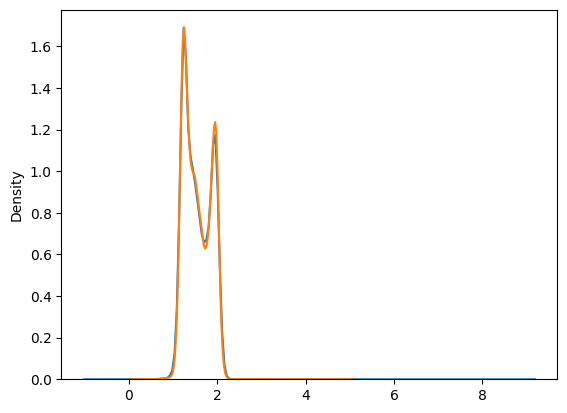

In [32]:
sn.kdeplot(samples[:, -1])
sn.kdeplot(real[:, -1])

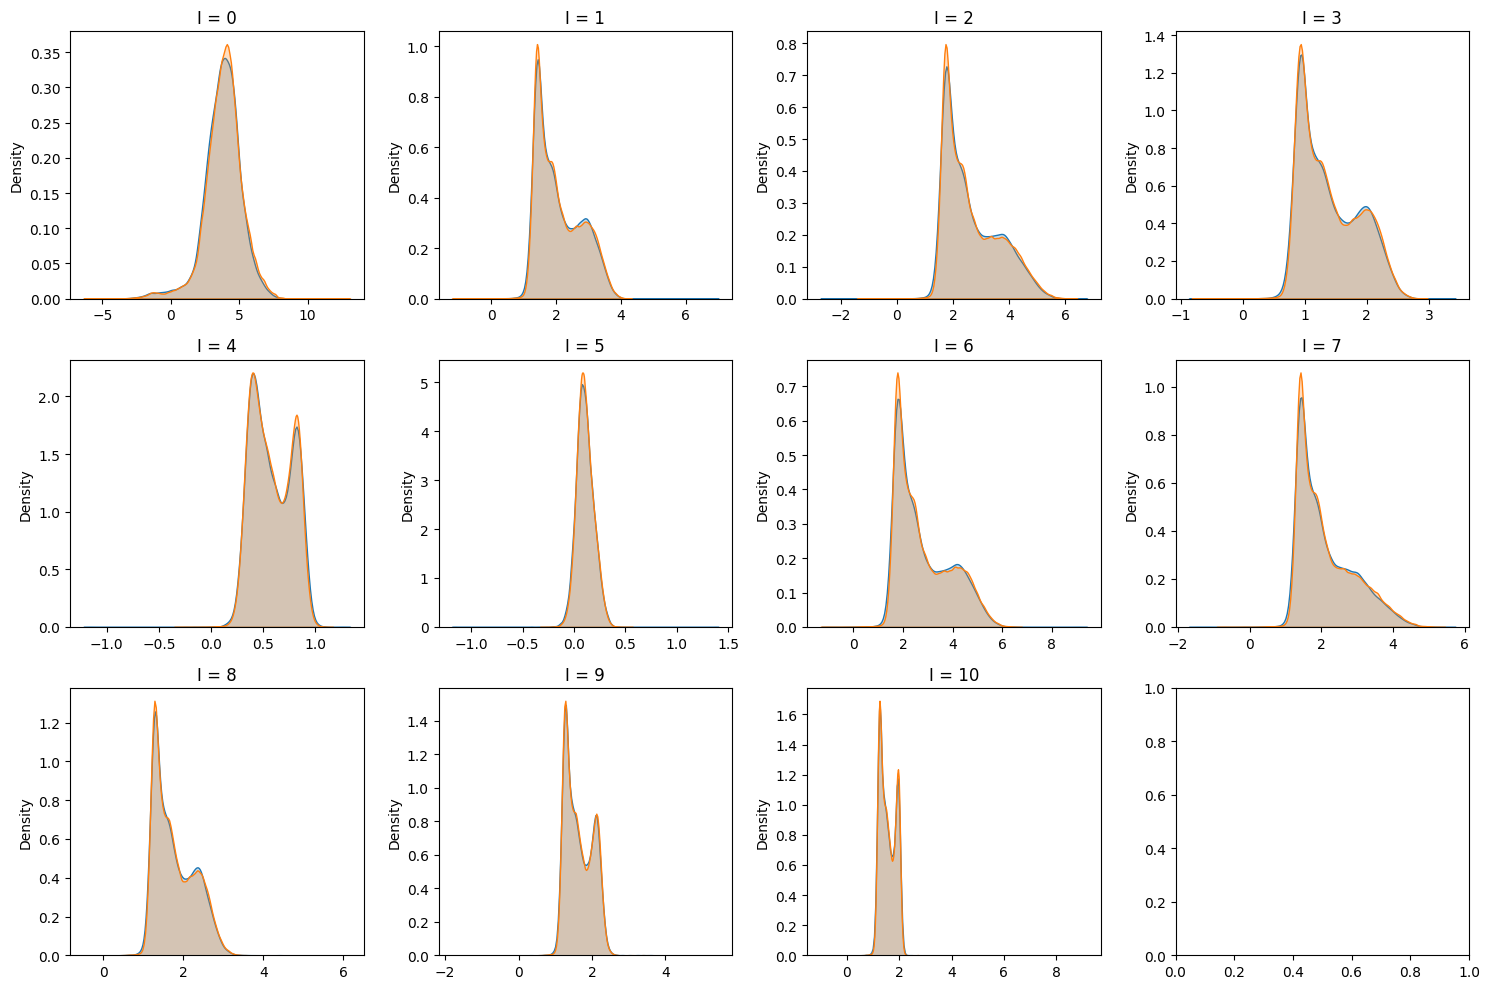

In [24]:
import seaborn as sn
import matplotlib.pyplot as plt

i=0
fig, axes = plt.subplots(3, 4, figsize=(15, 10))

# Loop through each subplot and plot the KDEs
for i, ax in enumerate(axes.flat):
    if i <= 10:  # Ensure not to exceed the range of 'I'
        sn.kdeplot(samples[:, i], fill=True, ax=ax)
        sn.kdeplot(real[:, i], fill=True, ax=ax)
        ax.set_title(f'I = {i}')  # Set subplot title

# Adjust layout
plt.tight_layout()
plt.show()

<Figure size 1500x700 with 0 Axes>

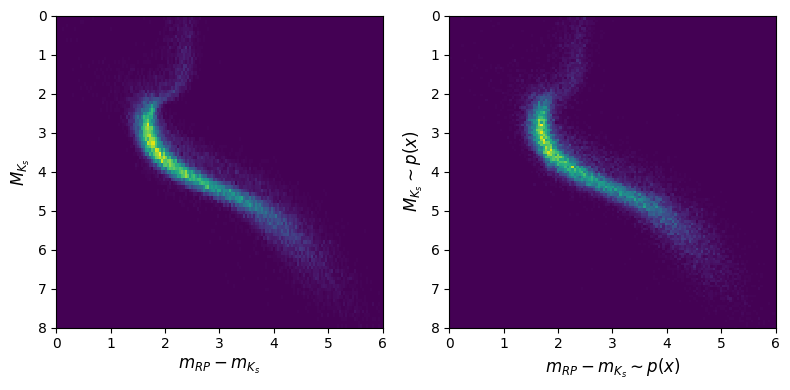

In [20]:
import matplotlib.pyplot as plt
x=samples
plt.figure(figsize=(15, 7))  # Adjust the figure size as needed for your paper layout
fig,axes=plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(8)
axes[0].hist2d(real[:,3-1], real[:,1-1],bins=200)  # Adjust the colormap as needed

# Creating the 2D histogram
axes[1].hist2d(x[:,3-1], x[:,1-1],bins=200)  # Adjust the colormap as needed
axes[0].set_xlabel('$m_{RP}-m_{K_s}$', fontsize=12)  # Adjust the label and font size as needed
axes[0].set_ylabel('$M_{K_s}$', fontsize=12)  
# Setting labels and title
axes[1].set_xlabel('$m_{RP}-m_{K_s} \sim p(x)$', fontsize=12)  # Adjust the label and font size as needed
axes[1].set_ylabel('$M_{K_s} \sim p(x)$', fontsize=12)  # Adjust the label and font size as needed
#plt.title('2D Histogram', fontsize=14)  # Adjust the title and font size as needed

# Setting axis limits
axes[0].set_ylim(8, 0)  # Reverse the y-axis to have increasing values from bottom to top
axes[0].set_xlim(0,6)
axes[1].set_ylim(8, 0)  # Reverse the y-axis to have increasing values from bottom to top
axes[1].set_xlim(0,6)
# Adding a colorbar for better interpretation of the histogram
#cbar = plt.colorbar()
#cbar.set_label('N Stars', fontsize=12)  # Adjust the label and font size as needed
plt.tight_layout()
# Saving the plot
plt.savefig('/Users/mattocallaghan/XPNorm/Plots/hr_d_sampled.png', bbox_inches='tight')  # Adjust filename and DPI as needed
#plt.savefig('/Users/mattocallaghan/XPNorm/Plots/hr_d_sampled.pdf', bbox_inches='tight')  # Adjust filename and DPI as needed

plt.show()

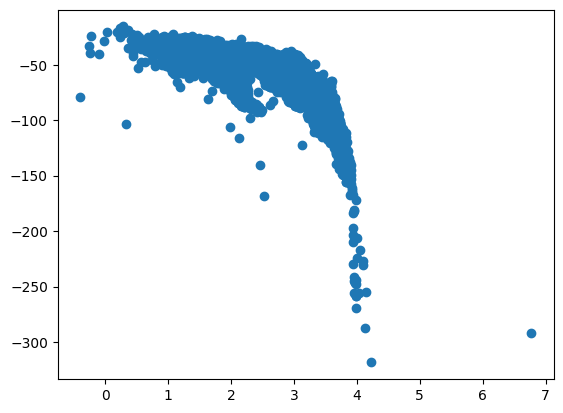

In [37]:
log_p=j.flow.log_prob(samples)
plt.scatter(samples[:,1],log_p)
#plt.ylim(15,-2)

In [56]:
final_bprp

,solution_id,DESIGNATION,SOURCE_ID,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,r_lo_photogeo,r_hi_photogeo,flag,bprp,g,g_error,bp_error,rp_error,mu_error,mu
2,1636148068921376768,Gaia DR3 3961541258166357248,3961541258166357248,1555819894,2016.0,193.041685,0.036729,26.698476,0.031120,0.330583,...,2454.53610,3025.775100,10023,0.667141,3.904515,0.003033,0.004565,0.004312,0.328859,12.403594
4,1636148068921376768,Gaia DR3 3961542804354605824,3961542804354605824,1177959363,2016.0,193.109505,0.075215,26.740397,0.055274,2.510523,...,375.80505,405.232000,10033,2.387670,9.401556,0.003132,0.027215,0.004410,0.080814,8.001179
6,1636148068921376768,Gaia DR3 3961530950244868736,3961530950244868736,1317967037,2016.0,193.155029,0.014792,26.718906,0.012422,0.625917,...,1479.15110,1564.896900,10012,0.543556,3.126251,0.003017,0.003093,0.003065,0.068574,11.017416
8,1636148068921376768,Gaia DR3 3961626985713558400,3961626985713558400,1001837412,2016.0,193.376961,0.024758,26.853431,0.020112,1.853939,...,520.75964,536.208740,10033,1.219420,6.525860,0.003013,0.003974,0.003242,0.036099,8.659523
9,1636148068921376768,Gaia DR3 3961627775987515520,3961627775987515520,1404193225,2016.0,193.313378,0.081991,26.888101,0.056466,0.508222,...,1919.30750,2494.349400,10033,0.940255,6.061722,0.003112,0.010948,0.007519,0.396458,11.469735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208026,1636148068921376768,Gaia DR3 4997957411182642944,4997957411182642944,442348980,2016.0,4.031862,0.022937,-39.304092,0.017365,11.396897,...,87.07721,87.646065,10033,2.399994,10.552674,0.003028,0.004440,0.003215,0.006097,4.716067
208028,1636148068921376768,Gaia DR3 4997969093493698432,4997969093493698432,1007650579,2016.0,3.957323,0.011420,-39.283708,0.008508,1.218117,...,783.91930,805.250100,10033,0.855404,3.976952,0.003006,0.003136,0.003040,0.028114,9.571555
208029,1636148068921376768,Gaia DR3 4997969157917970432,4997969157917970432,1220620431,2016.0,3.963254,0.083737,-39.267956,0.063657,1.096154,...,852.96063,1032.521500,10033,1.743223,7.995076,0.003191,0.015067,0.007731,0.237705,9.800642
208032,1636148068921376768,Gaia DR3 4997969471450817024,4997969471450817024,73571950,2016.0,3.977062,0.036396,-39.279860,0.027382,0.449447,...,1912.74650,2299.029000,10033,0.796679,4.801705,0.003036,0.004882,0.004278,0.254746,11.736608


In [13]:
data_transform=np.array([
                                [1., 0., 0., 0., 0., 0.,0],
                                [-1., 0., 0., 0., 0., 0.,1],
                                [0., 0., 1., 0., 0., 0.,-1],
                                [0., 0., 0., 1., 0., 0.,-1],
                                [0., 0., 0., 0., 1., 0.,-1],
                                [0., 0., 0., 0., 0., 1.,-1],
                                [0., 1., 0., 0., 0., 0.,-1]])

In [14]:
chosen_point_index=50000
g = np.array([0.7, 0.95])
bp =  np.array([0.97, 1.28])
rp =  np.array([0.55, 0.69])
j =  np.array([0.71, 0.73])/3.1
h =  np.array([0.45, 0.47])/3.1
ks =  np.array([0.34, 0.36])/3.1

extinction_vector=(np.einsum('ij,j->i',data_transform,
                np.array([0,g.mean(), bp.mean(), rp.mean(), j.mean(), h.mean(), ks.mean()])))
       

error=np.array([0.07,0.00308123, 0.01036897, 0.0043106 , 0.03507253, 0.03733693,
       0.05396977])**2
error=np.sqrt(np.einsum('ij,bj->bi',np.abs(np.array(data_transform)),error[None,:]))


In [15]:
0.00232867

0.00232867

In [16]:
0.00232867/0.16

0.014554187500000001

In [17]:
error*extinction_vector

array([[0.        , 0.00997948, 0.05562162, 0.02745505, 0.00768224,
        0.00232867, 0.03849428]])

In [18]:
np.sort(np.sqrt((ra-ra[100000])**2+(dec-dec[100000])**2))[1]

0.060272006754225955

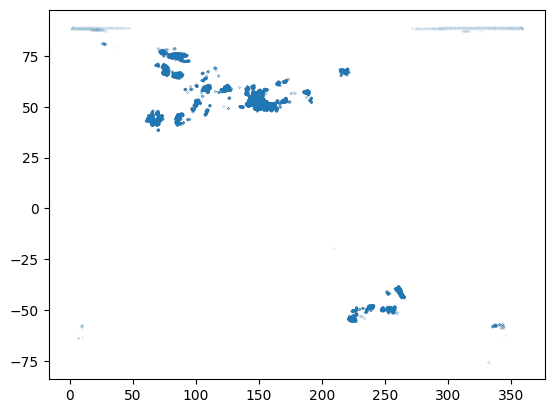

In [21]:
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u

plt.scatter(l[idx],b[idx],s=0.001)


In [24]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

# Define functions for circle intersection and overlap detection
def circle_intersection(circle1, circle2):
    radius1, center1 = circle1
    radius2, center2 = circle2
    d = np.linalg.norm(center1 - center2)
    if d >= radius1 + radius2:
        return 0  # circles are disjoint
    elif d <= abs(radius1 - radius2):
        return min(radius1, radius2) ** 2 * np.pi  # one circle is completely inside the other
    else:
        # circles intersect
        intersection_area = radius1 ** 2 * np.arccos(
            (d ** 2 + radius1 ** 2 - radius2 ** 2) / (2 * d * radius1)
        ) + radius2 ** 2 * np.arccos(
            (d ** 2 + radius2 ** 2 - radius1 ** 2) / (2 * d * radius2)
        ) - 0.5 * np.sqrt(
            (-d + radius1 + radius2) * (d + radius1 - radius2) * (d - radius1 + radius2) * (d + radius1 + radius2)
        )
        return intersection_area

def find_overlapping_circles(circle_centers, circle_radii):
    num_circles = len(circle_centers)
    overlapping = np.zeros((num_circles, num_circles), dtype=bool)
    for i in range(num_circles):
        for j in range(i + 1, num_circles):
            if circle_intersection((circle_radii[i], circle_centers[i]), (circle_radii[j], circle_centers[j])) > 0:
                overlapping[i, j] = True
                overlapping[j, i] = True
    return overlapping

# Generate some sample circle centers and radii
circle_centers = np.concatenate((l[idx],b[idx]),axis=1)
circle_radii = np.array([0.04 for i in range(len(b[idx]))])

# Find overlapping circles
overlapping = find_overlapping_circles(circle_centers, circle_radii)

# Perform clustering based on overlap
clusters = []
visited = set()
for i in range(len(overlapping)):
    if i not in visited:
        cluster = set()
        to_visit = {i}
        while to_visit:
            current = to_visit.pop()
            cluster.add(current)
            visited.add(current)
            to_visit.update(j for j, overlap in enumerate(overlapping[current]) if overlap and j not in visited)
        clusters.append(cluster)

# Calculate covering circles for each cluster

covering_circles = []
for cluster in clusters:
    cluster_centers = circle_centers[list(cluster)]
    cluster_radii = circle_radii[list(cluster)]
    cluster_center = np.mean(cluster_centers, axis=0)
    max_distance = max(np.linalg.norm(cluster_centers - cluster_center, axis=1) + cluster_radii)
    covering_circles.append((max_distance, cluster_center))

print("Covering Circles:")
for radius, center in covering_circles:
    print(f"Center: {center}, Radius: {radius}")


KeyboardInterrupt: 

In [37]:
idx=10000
exts=flow.flow.sample(jr.PRNGKey(0),condition=flow.data[idx,0:7])
(exts*flow.std[7:]+flow.mean[7:])

Array([ 5.1708221e-03,  2.8133392e-05, -2.2990704e-03, -2.5120974e-03,
       -1.1107624e-03, -6.8235397e-04], dtype=float32)

In [38]:
flow.std[7:]

Array([1.141037  , 1.5314924 , 0.89146155, 0.41091093, 0.2608052 ,
       0.1761944 ], dtype=float32)

In [35]:
(flow.data[idx,]*flow.std+flow.mean)

Array([9.9992752e-04, 6.2991157e+00, 7.0110130e+00, 5.4838676e+00,
       4.4841537e+00, 3.7863233e+00, 3.6936469e+00, 8.0347061e-04,
       1.0535717e-03, 6.3395500e-04, 2.8455257e-04, 1.8072128e-04,
       1.2221932e-04], dtype=float32)

In [2]:

from astropy.coordinates import SkyCoord
from dustmaps.planck import PlanckQuery

from dustmaps.bayestar import BayestarQuery
from dustmaps.lenz2017 import Lenz2017Query

from astropy.coordinates import SkyCoord
import astropy.units as u
import pyro
from dustmaps.edenhofer2023 import Edenhofer2023Query
 



    

# Define Galactic coordinates (l, b) in degrees
l = 166.57 # Galactic longitude in degrees
b = 22.5   # Galactic latitude in degrees
b = -23.75  # Galactic latitude in degrees
galactic_coord = SkyCoord(l=l*u.degree, b=b*u.degree, frame='galactic')
equatorial_coord = galactic_coord.transform_to('icrs')
print(equatorial_coord)

<SkyCoord (ICRS): (ra, dec) in deg
    (56.58101793, 23.9477124)>


In [9]:
csv_location='/Users/mattocallaghan/XPNorm/Data/data_merope_1'
data=pd.read_csv(csv_location)[['mu','phot_g_mean_mag','phot_bp_mean_mag','phot_rp_mean_mag','j_m','h_m','ks_m']]

#data=pd.read_csv(csv_location)[['mu','phot_g_mean_mag','phot_bp_mean_mag','phot_rp_mean_mag','j_m','h_m','ks_m']].values
##csv_location='/Users/mattocallaghan/XPNorm/Data/data_full'


In [17]:
teff=np.arange(3500,10000,100)
logg=np.arange(0,5,0.15)
feh=np.arange(-3,0.5,0.5)
#Rv=np.arange(1,5,0.2)
av=np.arange(0.001,5,0.1)

mesh=np.meshgrid(teff,logg,feh,av)
teff=mesh[0].flatten()[:,None]
logg=mesh[1].flatten()[:,None]
feh=mesh[2].flatten()[:,None]
av=mesh[3].flatten()[:,None]
np.load('exts.npy')
columns = ['teff','feh','logg','av',"Gaia_G_EDR3", "Gaia_BP_EDR3", 'Gaia_RP_EDR3','2MASS_J','2MASS_H','2MASS_Ks','WISE_W1','WISE_W2','PS_g','PS_i','PS_r','PS_y','PS_z'] #add wise on later.
data=pd.DataFrame(np.concatenate((teff,logg,feh,av,np.load('exts.npy')),1),columns=columns)

In [18]:
data

,teff,feh,logg,av,Gaia_G_EDR3,Gaia_BP_EDR3,Gaia_RP_EDR3,2MASS_J,2MASS_H,2MASS_Ks,WISE_W1,WISE_W2,PS_g,PS_i,PS_r,PS_y,PS_z
0,3500.0,0.00,-3.0,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3500.0,0.00,-3.0,0.101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3500.0,0.00,-3.0,0.201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3500.0,0.00,-3.0,0.301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3500.0,0.00,-3.0,0.401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773495,9900.0,4.95,0.0,4.501,3.925442,5.037779,2.870885,1.289571,0.815499,0.549817,0.317235,0.220347,5.604939,2.993415,4.040545,1.971987,2.360158
773496,9900.0,4.95,0.0,4.601,3.998736,5.140726,2.931498,1.318078,0.833580,0.562022,0.324272,0.225239,5.726027,3.059285,4.128796,2.015667,2.412384
773497,9900.0,4.95,0.0,4.701,4.071601,5.243370,2.991980,1.346579,0.851660,0.574227,0.331309,0.230131,5.846981,3.125128,4.216985,2.059341,2.464600
773498,9900.0,4.95,0.0,4.801,4.144048,5.345717,3.052331,1.375074,0.869739,0.586432,0.338346,0.235024,5.967802,3.190944,4.305110,2.103009,2.516808


In [4]:
csv_location='/Users/mattocallaghan/XPNorm/Data/data_full'
data=pd.read_csv(csv_location)[['mu','phot_g_mean_mag','phot_bp_mean_mag','phot_rp_mean_mag','j_m','h_m','ks_m','ra','dec']]
data=data[:len(data)//32]

In [29]:
len(data)

10951

In [7]:
galactic_coord = SkyCoord(ra=data['ra'].values*u.degree, dec=data['dec'].values*u.degree, frame='icrs')
equatorial_coord = galactic_coord.transform_to('galactic')

In [8]:
(equatorial_coord.b.max()-equatorial_coord.b.min())/2

<Angle 56.19268638 deg>

In [9]:
data['dec'].max()-data['dec'].min()

114.46785794344808

In [10]:
data['bprp']=data['phot_bp_mean_mag']-data['phot_rp_mean_mag']
data['G']=data['phot_bp_mean_mag']-data['mu']

In [11]:
data_test=data.copy()

In [12]:
from src.Normalising_Flow_nodist import Normalising_Flow_Trainer
nf=Normalising_Flow_Trainer()
nf.load()

In [13]:


plt.figure(figsize=(6, 4))  # Adjust the figure size as needed for your paper layout
#lt.scatter(nf.data[:len(nf.data)//32,0]+nf.mean[0], nf.data[:len(nf.data)//32,1]+nf.mean[1],s=1)  # Adjust the colormap as needed

data_test['d']=np.sin(np.radians(25))*(10 ** ((((data_test['mu'])) + 5) / 5))
data['d']=np.sin(np.radians(45))*(10 ** ((((data['mu'])) + 5) / 5))

# Creating the 2D histogram
sn.kdeplot(data[:len(data)//32],x='d',y='bprp',legend=True,c='b')

sn.kdeplot(data_test[:len(data_test)//32],x='d',y='bprp',legend=True,c='red')

plt.plot([], [], color='red', label='Red Data')
plt.plot([], [], color='b', label='Training Region')
plt.legend()
# Setting labels and title
plt.xlabel('$r$ $\sin(b)$', fontsize=12)  # Adjust the label and font size as needed
plt.ylabel('$m_{BP}-m_{G}$', fontsize=12)  # Adjust the label and font size as needed
#plt.title('2D Histogram', fontsize=14)  # Adjust the title and font size as needed

# Setting axis limits
#plt.ylim(12, 0)  # Reverse the y-axis to have increasing values from bottom to top
#plt.xlim(0,1.7)
# Adding a colorbar for better interpretation of the histogram
#cbar = plt.colorbar()
#cbar.set_label('N Stars', fontsize=12)  # Adjust the label and font size as needed

plt.xlim(-300,3000)
plt.tight_layout()
bounds = [(346, 393), (1250, 2140)]

# Create a figure and axis

# Saving the plot
#plt.savefig('/Users/mattocallaghan/XPNorm/Plots/par_distance_angle.png', bbox_inches='tight')  # Adjust filename and DPI as needed
#plt.savefig('/Users/mattocallaghan/XPNorm/Plots/par_distance_angle.pdf', bbox_inches='tight')  # Adjust filename and DPI as needed

plt.show()
plt.show()

NameError: name 'plt' is not defined

In [14]:
import matplotlib.pyplot as plt
import seaborn as sn

(10.0, 2.0)

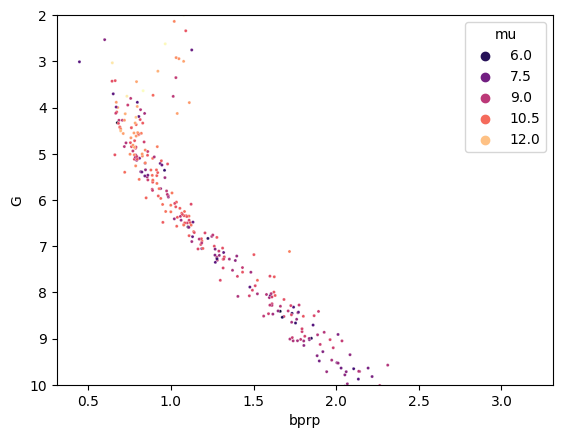

In [15]:
import seaborn as sn
sn.scatterplot(data[:len(data)//32],x='bprp',y='G',hue='mu',s=5,palette='magma')
plt.ylim(10,2)

(10.0, 2.0)

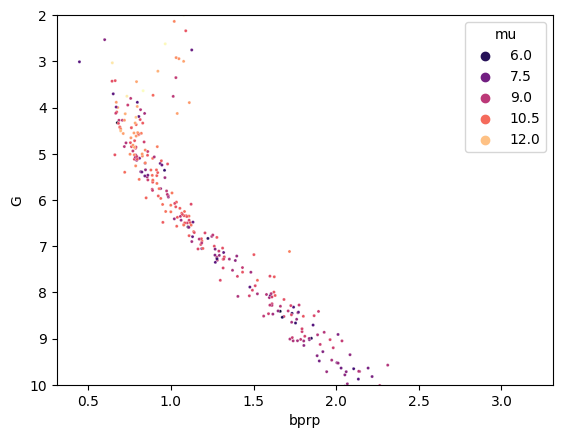

In [16]:
import seaborn as sn
sn.scatterplot(data[:len(data)//32],x='bprp',y='G',hue='mu',s=5,palette='magma')
plt.ylim(10,2)

In [17]:
pd.read_csv('/Users/mattocallaghan/XPNorm/Data/err').mean()

Unnamed: 0    63.500000
ks_msigcom     0.057250
mu_error       0.052748
g_error        0.003038
bp_error       0.006112
rp_error       0.003835
j_msigcom      0.034000
h_msigcom      0.047750
ra_error       0.025399
dec_error      0.027358
dtype: float64

In [18]:



data_transform=np.array([
                                [1., 0., 0., 0., 0., 0.,0],
                                [-1., 1., 0., 0., 0., 0.,0],
                                [0., 1., -1., 0., 0., 0.,0],
                                [0., 1., 0., -1., 0., 0.,0],
                                [0., 1., 0., 0., -1., 0.,0],
                                [0., 1., 0., 0., 0., -1.,0],
                                [0., 1., 0., 0., 0., 0.,-1]])

g = np.array([0.7, 0.95])
bp =  np.array([0.97, 1.28])
rp =  np.array([0.55, 0.69])
j =  np.array([0.71, 0.73])/3.1
h =  np.array([0.45, 0.47])/3.1
ks =  np.array([0.34, 0.36])/3.1

#extinction_vector=torch.tensor(np.einsum('ij,j->i',data_transform,
#np.array([0,g.mean(), bp.mean(), rp.mean(), j.mean(), h.mean(), ks.mean()])))
    

data=np.einsum('ij,bj->bi',np.array(data_transform),np.array(data))



ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (7,7)->(7,7) (10951,11)->(10951,newaxis,11) 

In [19]:
import matplotlib.pyplot as plt

In [20]:
plt.scatter(-data[:,2],data[:,1],s=2)
plt.ylim(12,0)
plt.show()


InvalidIndexError: (slice(None, None, None), 2)

In [ ]:
plt.hist2d(data[:,3],data[:,1],bins=500)
plt.ylim(12,0)|
plt.show()


SyntaxError: invalid syntax (1139725641.py, line 2)

In [ ]:
plt.figure(figsize=(7, 4.5))  # Adjust the figure size as needed for your paper layout

# Creating the 2D histogram
plt.hist2d(data[:,3], data[:,1], bins=500, cmap='viridis')  # Adjust the colormap as needed

# Setting labels and title
plt.xlabel('$m_{BP}-m_{G}$', fontsize=12)  # Adjust the label and font size as needed
plt.ylabel('$M_{G}$', fontsize=12)  # Adjust the label and font size as needed
#plt.title('2D Histogram', fontsize=14)  # Adjust the title and font size as needed

# Setting axis limits
plt.ylim(12, 0)  # Reverse the y-axis to have increasing values from bottom to top

# Adding a colorbar for better interpretation of the histogram
cbar = plt.colorbar()
cbar.set_label('N Stars', fontsize=12)  # Adjust the label and font size as needed

# Saving the plot
#plt.savefig('hr_d.pdf', dpi=300, bbox_inches='tight')  # Adjust filename and DPI as needed
plt.show()

InvalidIndexError: (slice(None, None, None), 3)

<Figure size 700x450 with 0 Axes>

In [21]:
nf.losses

[]

In [25]:
x=np.concatenate(x)

In [26]:
import seaborn as sn

<Axes: ylabel='Density'>

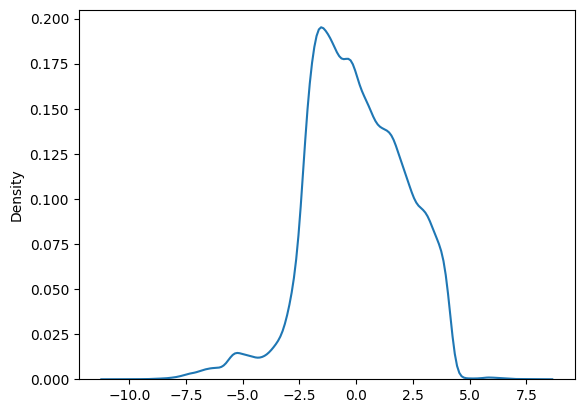

In [27]:
sn.kdeplot(x[:,0]-nf.mean[0])
#plt.xlim(0,2)

In [24]:
import torch

In [25]:
x.shape

(104180, 6)

In [40]:
p=nf.nfm.log_prob(torch.tensor(x-nf.mean))

<Figure size 1500x700 with 0 Axes>

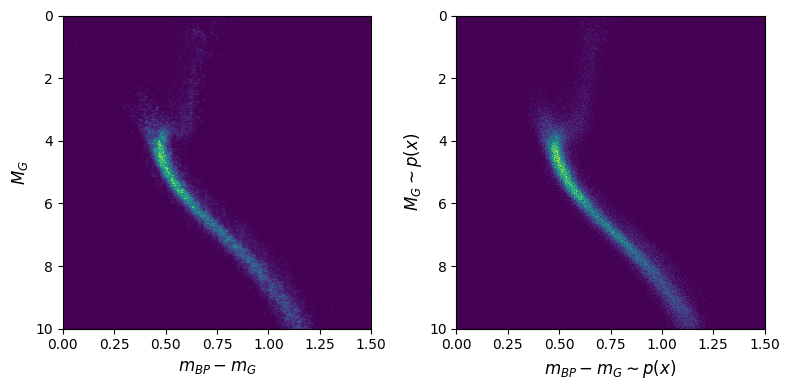

In [26]:
x=[nf.sample(len(nf.data)//32) for _ in range(10)]
plt.figure(figsize=(15, 7))  # Adjust the figure size as needed for your paper layout
fig,axes=plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(8)
axes[0].hist2d(nf.data[:,3-1]+nf.mean[3-1], nf.data[:,1-1]+nf.mean[1-1],bins=500)  # Adjust the colormap as needed

# Creating the 2D histogram
axes[1].hist2d(x[:,3-1], x[:,1-1],bins=500)  # Adjust the colormap as needed
axes[0].set_xlabel('$m_{BP}-m_{G}$', fontsize=12)  # Adjust the label and font size as needed
axes[0].set_ylabel('$M_{G}$', fontsize=12)  
# Setting labels and title
axes[1].set_xlabel('$m_{BP}-m_{G} \sim p(x)$', fontsize=12)  # Adjust the label and font size as needed
axes[1].set_ylabel('$M_{G} \sim p(x)$', fontsize=12)  # Adjust the label and font size as needed
#plt.title('2D Histogram', fontsize=14)  # Adjust the title and font size as needed

# Setting axis limits
axes[0].set_ylim(10, 0)  # Reverse the y-axis to have increasing values from bottom to top
axes[0].set_xlim(0,1.5)
axes[1].set_ylim(10, 0)  # Reverse the y-axis to have increasing values from bottom to top
axes[1].set_xlim(0,1.5)
# Adding a colorbar for better interpretation of the histogram
#cbar = plt.colorbar()
#cbar.set_label('N Stars', fontsize=12)  # Adjust the label and font size as needed
plt.tight_layout()
# Saving the plot
#plt.savefig('/Users/mattocallaghan/XPNorm/Plots/hr_d_sampled.png', bbox_inches='tight')  # Adjust filename and DPI as needed
#plt.savefig('/Users/mattocallaghan/XPNorm/Plots/hr_d_sampled.pdf', bbox_inches='tight')  # Adjust filename and DPI as needed

plt.show()

<Figure size 1500x700 with 0 Axes>

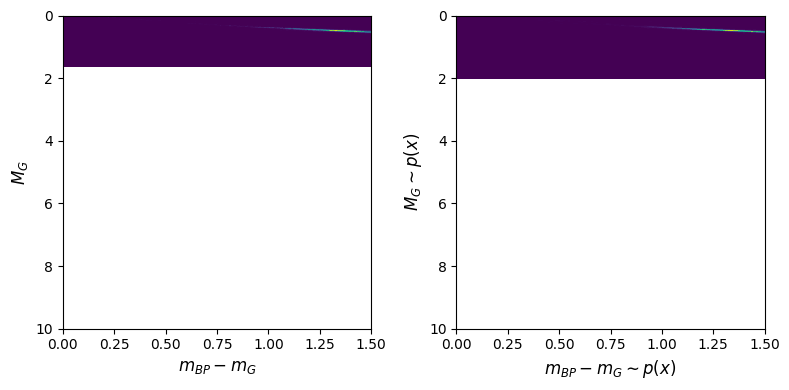

In [42]:
plt.figure(figsize=(15, 7))  # Adjust the figure size as needed for your paper layout
fig,axes=plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(8)
axes[0].hist2d(nf.data[:,3+1]+nf.mean[3+1], nf.data[:,1+1]+nf.mean[1+1],bins=500)  # Adjust the colormap as needed

# Creating the 2D histogram
axes[1].hist2d(x[:,3+1], x[:,1+1],bins=500)  # Adjust the colormap as needed
axes[0].set_xlabel('$m_{BP}-m_{G}$', fontsize=12)  # Adjust the label and font size as needed
axes[0].set_ylabel('$M_{G}$', fontsize=12)  
# Setting labels and title
axes[1].set_xlabel('$m_{BP}-m_{G} \sim p(x)$', fontsize=12)  # Adjust the label and font size as needed
axes[1].set_ylabel('$M_{G} \sim p(x)$', fontsize=12)  # Adjust the label and font size as needed
#plt.title('2D Histogram', fontsize=14)  # Adjust the title and font size as needed

# Setting axis limits
axes[0].set_ylim(10, 0)  # Reverse the y-axis to have increasing values from bottom to top
axes[0].set_xlim(0,1.5)
axes[1].set_ylim(10, 0)  # Reverse the y-axis to have increasing values from bottom to top
axes[1].set_xlim(0,1.5)
# Adding a colorbar for better interpretation of the histogram
#cbar = plt.colorbar()
#cbar.set_label('N Stars', fontsize=12)  # Adjust the label and font size as needed
plt.tight_layout()
# Saving the plot
#plt.savefig('/Users/mattocallaghan/XPNorm/Plots/hr_d_sampled.png', bbox_inches='tight')  # Adjust filename and DPI as needed
#plt.savefig('/Users/mattocallaghan/XPNorm/Plots/hr_d_sampled.pdf', bbox_inches='tight')  # Adjust filename and DPI as needed

plt.show()

In [ ]:
nf.data[:,0]

array([ 0.61855768, -0.69288617, -1.04473308, ..., -0.77754662,
        0.08706452, -2.18840765])

In [ ]:
x[:,0]

array([10.69319101,  9.96620861,  9.36047285, ...,  9.38316802,
       10.97501445,  9.95290256])

In [ ]:
b = torch.Tensor([1,1,0,0,0,0,0,0])
cp=x[x[:,0]<00.5]-nf.mean
cp[:,0]=1
distance = 10 ** (((torch.tensor(cp[:, 1:2])).detach().numpy() + nf.mean[1] + 5) / 5)

plt.scatter(distance,nf.t(torch.tensor(cp[:,1:])).detach())
plt.xlim(0,2000)

AttributeError: 'Normalising_Flow_Trainer' object has no attribute 't'

InvalidIndexError: (slice(None, None, None), 3)

<Figure size 1500x700 with 0 Axes>

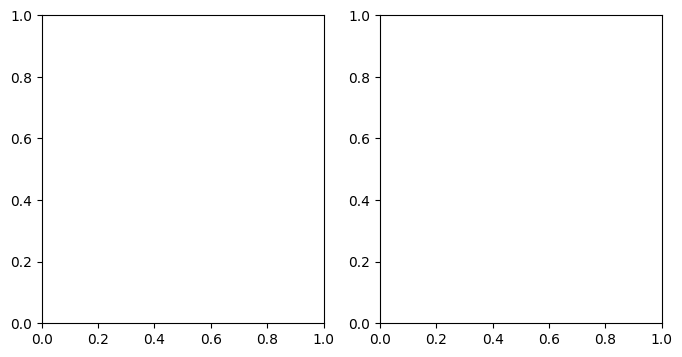

In [ ]:
plt.figure(figsize=(15, 7))  # Adjust the figure size as needed for your paper layout
fig,axes=plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(8)
axes[0].hist2d(data[:,3],data[:,1],bins=100)  # Adjust the colormap as needed

# Creating the 2D histogram
axes[1].hist2d(x[:,3], x[:,1],bins=100)  # Adjust the colormap as needed
axes[0].set_xlabel('$m_{BP}-m_{G}$', fontsize=12)  # Adjust the label and font size as needed
axes[0].set_ylabel('$M_{G}$', fontsize=12)  
# Setting labels and title
axes[1].set_xlabel('$m_{BP}-m_{G} \sim p(x)$', fontsize=12)  # Adjust the label and font size as needed
axes[1].set_ylabel('$M_{G} \sim p(x)$', fontsize=12)  # Adjust the label and font size as needed
#plt.title('2D Histogram', fontsize=14)  # Adjust the title and font size as needed

# Setting axis limits
axes[0].set_ylim(10, 0)  # Reverse the y-axis to have increasing values from bottom to top
axes[0].set_xlim(0,1.25)
axes[1].set_ylim(10, 0)  # Reverse the y-axis to have increasing values from bottom to top
axes[1].set_xlim(0,1.25)
# Adding a colorbar for better interpretation of the histogram
#cbar = plt.colorbar()
#cbar.set_label('N Stars', fontsize=12)  # Adjust the label and font size as needed
plt.tight_layout()
# Saving the plot
#plt.savefig('/Users/mattocallaghan/XPNorm/Plots/hr_d_sampled.png', bbox_inches='tight')  # Adjust filename and DPI as needed
#plt.savefig('/Users/mattocallaghan/XPNorm/Plots/hr_d_sampled.pdf', bbox_inches='tight')  # Adjust filename and DPI as needed

plt.show()

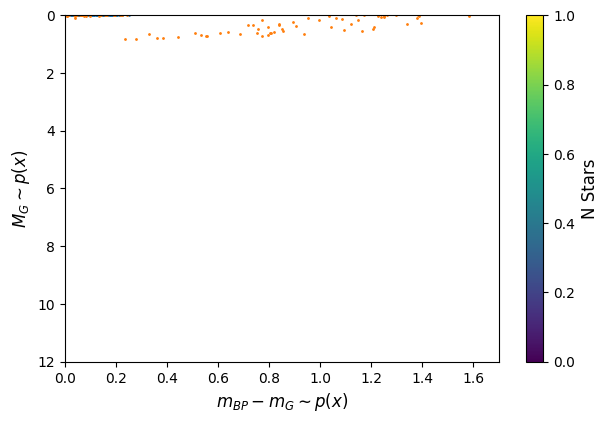

In [43]:
plt.figure(figsize=(7, 4.5))  # Adjust the figure size as needed for your paper layout
plt.scatter(nf.data[:,3]+nf.mean[3], nf.data[:,1]+nf.mean[1],s=1)  # Adjust the colormap as needed

# Creating the 2D histogram
plt.scatter(x[:,3], x[:,1],s=1)  # Adjust the colormap as needed

# Setting labels and title
plt.xlabel('$m_{BP}-m_{G} \sim p(x)$', fontsize=12)  # Adjust the label and font size as needed
plt.ylabel('$M_{G} \sim p(x)$', fontsize=12)  # Adjust the label and font size as needed
#plt.title('2D Histogram', fontsize=14)  # Adjust the title and font size as needed

# Setting axis limits
plt.ylim(12, 0)  # Reverse the y-axis to have increasing values from bottom to top
plt.xlim(0,1.7)
# Adding a colorbar for better interpretation of the histogram
cbar = plt.colorbar()
cbar.set_label('N Stars', fontsize=12)  # Adjust the label and font size as needed

# Saving the plot
#plt.savefig('hr_d.pdf', dpi=300, bbox_inches='tight')  # Adjust filename and DPI as needed
plt.show()

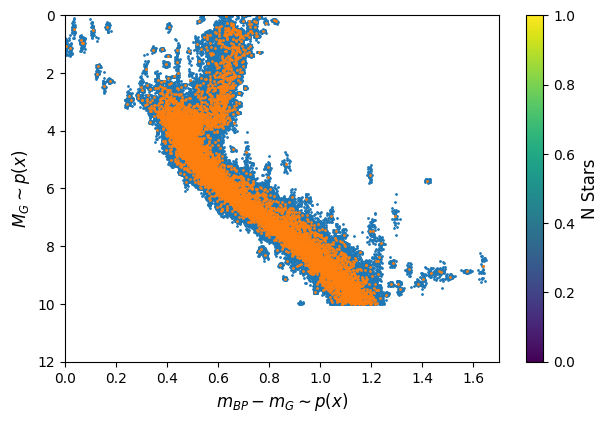

In [ ]:
plt.figure(figsize=(7, 4.5))  # Adjust the figure size as needed for your paper layout
plt.scatter(nf.data[:,3]+nf.mean[3], nf.data[:,1]+nf.mean[1],s=1)  # Adjust the colormap as needed

# Creating the 2D histogram
plt.scatter(nf.data[:len(nf.data)//32,3]+nf.mean[3], nf.data[:len(nf.data)//32,1]+nf.mean[1],s=1)  # Adjust the colormap as needed

# Setting labels and title
plt.xlabel('$m_{BP}-m_{G} \sim p(x)$', fontsize=12)  # Adjust the label and font size as needed
plt.ylabel('$M_{G} \sim p(x)$', fontsize=12)  # Adjust the label and font size as needed
#plt.title('2D Histogram', fontsize=14)  # Adjust the title and font size as needed

# Setting axis limits
plt.ylim(12, 0)  # Reverse the y-axis to have increasing values from bottom to top
plt.xlim(0,1.7)
# Adding a colorbar for better interpretation of the histogram
cbar = plt.colorbar()
cbar.set_label('N Stars', fontsize=12)  # Adjust the label and font size as needed

# Saving the plot
#plt.savefig('hr_d.pdf', dpi=300, bbox_inches='tight')  # Adjust filename and DPI as needed
plt.show()

In [ ]:
pd.DataFrame(np.stack([x[:,3],x[:,0],p.detach().numpy()],axis=1))

,0,1,2
0,0.456915,10.693191,7.684373
1,0.688661,9.966209,4.240045
2,0.490495,9.360473,7.140629
3,0.615907,9.500969,6.277420
4,0.499675,11.161287,5.801774
...,...,...,...
9995,0.559036,11.056519,-0.879332
9996,0.488114,8.391685,10.060657
9997,0.798448,9.383168,7.679238
9998,0.520514,10.975014,7.000980


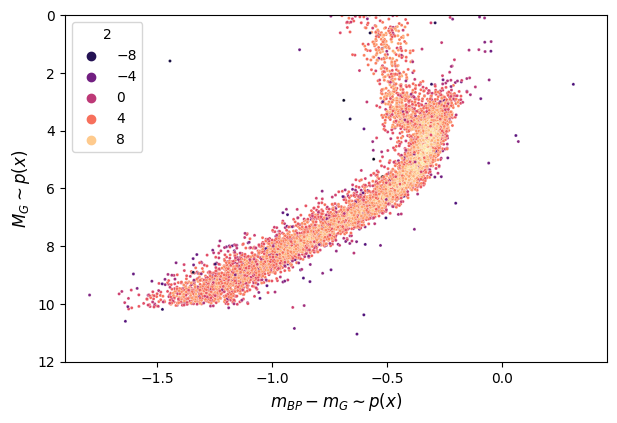

In [ ]:
plt.figure(figsize=(7, 4.5))  # Adjust the figure size as needed for your paper layout
p#lt.scatter(nf.data[:len(nf.data)//32,0]+nf.mean[0], nf.data[:len(nf.data)//32,1]+nf.mean[1],s=1)  # Adjust the colormap as needed
df=pd.DataFrame(np.stack([x[:,2],x[:,1],p.detach()],axis=1))
# Creating the 2D histogram
sn.scatterplot(df,x=0,y=1,hue=2,s=5,palette='magma')
# Setting labels and title
plt.xlabel('$m_{BP}-m_{G} \sim p(x)$', fontsize=12)  # Adjust the label and font size as needed
plt.ylabel('$M_{G} \sim p(x)$', fontsize=12)  # Adjust the label and font size as needed
#plt.title('2D Histogram', fontsize=14)  # Adjust the title and font size as needed

# Setting axis limits
plt.ylim(12, 0)  # Reverse the y-axis to have increasing values from bottom to top
#plt.xlim(0,1.7)
# Adding a colorbar for better interpretation of the histogram
#cbar = plt.colorbar()
#cbar.set_label('N Stars', fontsize=12)  # Adjust the label and font size as needed

# Saving the plot
#plt.savefig('hr_d.pdf', dpi=300, bbox_inches='tight')  # Adjust filename and DPI as needed
plt.show()

In [ ]:


plt.figure(figsize=(6, 4))  # Adjust the figure size as needed for your paper layout
#lt.scatter(nf.data[:len(nf.data)//32,0]+nf.mean[0], nf.data[:len(nf.data)//32,1]+nf.mean[1],s=1)  # Adjust the colormap as needed
df=pd.DataFrame(np.stack([x[:len(x)//5,0],x[:len(x)//5,2]],axis=1))
df2=pd.DataFrame(np.stack([nf.data[:len(x)//5,0]+nf.mean[0], nf.data[:len(x)//5,2]+nf.mean[2]],axis=1))

df=df[df[0]>6]
df=df[df[0]<14]
df=df[df[1]>-1.6]
df=df[df[1]<0.5]
df2=df2[df2[0]>6]
df2=df2[df2[0]<14]
df2=df2[df2[1]>-1.6]
df2=df2[df2[1]<0.5]
# Creating the 2D histogram
sn.kdeplot(df2,x=0,y=1,legend=True,c='b')

sn.kdeplot(df,x=0,y=1,legend=True,c='brown')
plt.plot([], [], color='b', label='Training Data')
plt.plot([], [], color='brown', label='Reddened Region')
plt.legend()
# Setting labels and title
plt.xlabel('$\mu$', fontsize=12)  # Adjust the label and font size as needed
plt.ylabel('$m_{BP}-m_{G}$', fontsize=12)  # Adjust the label and font size as needed
#plt.title('2D Histogram', fontsize=14)  # Adjust the title and font size as needed

# Setting axis limits
#plt.ylim(12, 0)  # Reverse the y-axis to have increasing values from bottom to top
#plt.xlim(0,1.7)
# Adding a colorbar for better interpretation of the histogram
#cbar = plt.colorbar()
#cbar.set_label('N Stars', fontsize=12)  # Adjust the label and font size as needed

# Saving the plot
plt.savefig('mu_colour_sam.pdf', dpi=300, bbox_inches='tight')  # Adjust filename and DPI as needed
plt.savefig('mu_colour_sam.png', dpi=300, bbox_inches='tight')  # Adjust filename and DPI as needed

plt.show()

In [12]:
import seaborn as sn

/opt/homebrew/Caskroom/miniforge/base/envs/astro/lib/python3.8/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'c'
  cset = contour_func(
/opt/homebrew/Caskroom/miniforge/base/envs/astro/lib/python3.8/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'c'
  cset = contour_func(


<Axes: xlabel='bprp', ylabel='mu'>

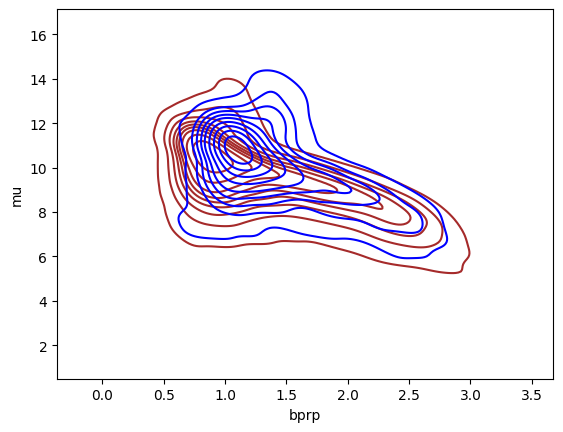

In [34]:
sn.kdeplot(data,x='bprp',y='mu',legend=True,c='brown')
sn.kdeplot(data_test,x='bprp',y='mu',legend=True,c='b')



/opt/homebrew/Caskroom/miniforge/base/envs/astro/lib/python3.8/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'c'
  cset = contour_func(


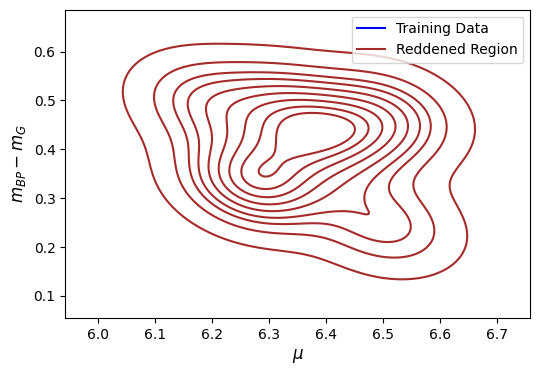

In [ ]:


plt.figure(figsize=(6, 4))  # Adjust the figure size as needed for your paper layout
#lt.scatter(nf.data[:len(nf.data)//32,0]+nf.mean[0], nf.data[:len(nf.data)//32,1]+nf.mean[1],s=1)  # Adjust the colormap as needed
df=pd.DataFrame(np.stack([x[:len(x)//5,0],x[:len(x)//5,2]],axis=1))
df2=pd.DataFrame(np.stack([nf.data[:len(x)//5,0]+nf.mean[0], nf.data[:len(x)//5,2]+nf.mean[2]],axis=1))

df=df[df[0]>6]
df=df[df[0]<14]
df=df[df[1]>-1.6]
df=df[df[1]<0.5]
df2=df2[df2[0]>6]
df2=df2[df2[0]<14]
df2=df2[df2[1]>-1.6]
df2=df2[df2[1]<0.5]
# Creating the 2D histogram
sn.kdeplot(df2,x=0,y=1,legend=True,c='b')

sn.kdeplot(df,x=0,y=1,legend=True,c='brown')
plt.plot([], [], color='b', label='Training Data')
plt.plot([], [], color='brown', label='Reddened Region')
plt.legend()
# Setting labels and title
plt.xlabel('$\mu$', fontsize=12)  # Adjust the label and font size as needed
plt.ylabel('$m_{BP}-m_{G}$', fontsize=12)  # Adjust the label and font size as needed
#plt.title('2D Histogram', fontsize=14)  # Adjust the title and font size as needed

# Setting axis limits
#plt.ylim(12, 0)  # Reverse the y-axis to have increasing values from bottom to top
#plt.xlim(0,1.7)
# Adding a colorbar for better interpretation of the histogram
#cbar = plt.colorbar()
#cbar.set_label('N Stars', fontsize=12)  # Adjust the label and font size as needed

# Saving the plot
plt.savefig('mu_colour_sam.pdf', dpi=300, bbox_inches='tight')  # Adjust filename and DPI as needed
plt.savefig('mu_colour_sam.png', dpi=300, bbox_inches='tight')  # Adjust filename and DPI as needed

plt.show()

In [ ]:
nf.data_test

AttributeError: 'Normalising_Flow_Trainer' object has no attribute 'data_test'

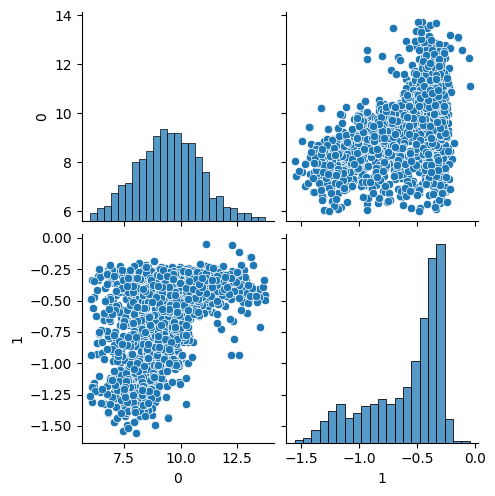

In [ ]:
sn.pairplot(df)

In [ ]:
plt.scatter(data[:len(data)//32,0], data[:len(data)//32,1],s=1)  # Adjust the colormap as needed
df=pd.DataFrame(np.stack([x[:,0],x[:,1],p.detach().numpy()],axis=1))
# Creating the 2D histogram
sn.scatterplot(df,x=0,y=1,hue=2,s=1)

InvalidIndexError: (slice(None, 2546, None), 0)

In [ ]:
#plt.scatter(data[:len(data)//32,0], data[:len(data)//32,1],s=1)  # Adjust the colormap as needed
df=pd.DataFrame(np.stack([x[:,0],x[:,1],x[:,0]],axis=1))
# Creating the 2D histogram
sn.kdeplot(x[:,5])
sn.kdeplot(nf.data[:len(nf.data)//32,5]+nf.mean[5])

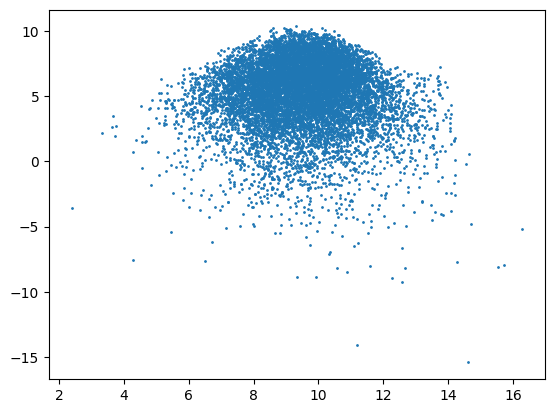

In [ ]:
plt.scatter(x[:,0], p.detach().numpy(),s=1)  # Adjust the colormap as needed


<Figure size 1800x900 with 0 Axes>

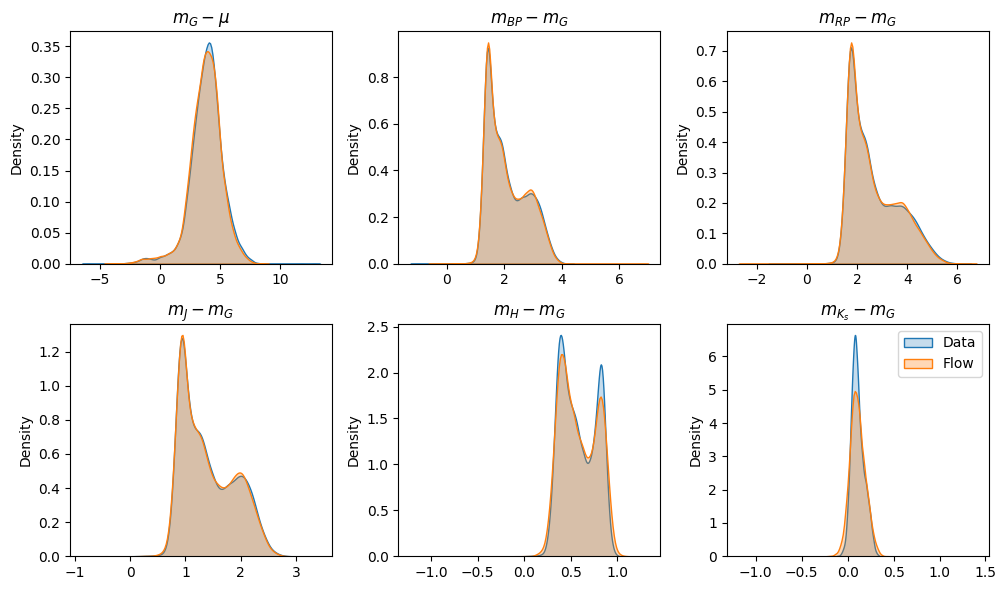

In [22]:
import seaborn as sn
plt.figure(figsize=(18, 9))  # Adjust the figure size as needed for your paper layout
fig,axes=plt.subplots(2,3)
axes=axes.flatten()
fig.set_figheight(6)
fig.set_figwidth(10)
sn.kdeplot((real[:,0]),label='Data',ax=axes[0],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,0],label='Flow',ax=axes[0],fill=True,alpha=0.3)

sn.kdeplot(real[:,1],label='Data',ax=axes[1],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,1],label='Flow',ax=axes[1],fill=True,alpha=0.3)

sn.kdeplot(real[:,2],label='Data',ax=axes[2],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,2],label='Flow',ax=axes[2],fill=True,alpha=0.3)

sn.kdeplot(real[:,3],label='Data',ax=axes[3],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,3],label='Flow',ax=axes[3],fill=True,alpha=0.3)

sn.kdeplot(real[:,4],label='Data',ax=axes[4],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,4],label='Flow',ax=axes[4],fill=True,alpha=0.3)

sn.kdeplot(real[:,5],label='Data',ax=axes[5],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,5],label='Flow',ax=axes[5],fill=True,alpha=0.3)

#sn.kdeplot(nf.data[:,6]+nf.mean[6],label='Data',ax=axes[6],fill=True)  # Adjust the colormap as needed
#sn.kdeplot(x[:,6],label='Flow',ax=axes[6],fill=True,alpha=0.3)

#sn.kdeplot(nf.data[:,3]+nf.mean[3]-(nf.data[:,2]+nf.mean[2]),label='Data',ax=axes[7],fill=True)  # Adjust the colormap as needed
#sn.kdeplot(x[:,3]-x[:,2],label='Flow',ax=axes[7],fill=True,alpha=0.3)

#sn.kdeplot(nf.data[:,-1]+nf.mean[-1]+(nf.data[:,1]+nf.mean[1]),label='Data',ax=axes[8],fill=True)  # Adjust the colormap as needed
#sn.kdeplot(x[:,-1]+x[:,1],label='Flow',ax=axes[8],fill=True,alpha=0.3)

#axes[0].set_title('$\mu$', fontsize=12)  # Adjust the label and font size as needed
axes[0].set_title('$m_G-\mu$', fontsize=12)  # Adjust the label and font size as needed
axes[1].set_title('$m_{BP}-m_{G}$', fontsize=12)  # Adjust the label and font size as needed
axes[2].set_title('$m_{RP}-m_{G}$', fontsize=12)  # Adjust the label and font size as needed
axes[3].set_title('$m_{J}-m_{G}$', fontsize=12)  # Adjust the label and font size as needed
axes[4].set_title('$m_{H}-m_{G}$', fontsize=12)  # Adjust the label and font size as needed
axes[5].set_title('$m_{K_s}-m_{G}$', fontsize=12)  # Adjust the label and font size as needed
#axes[7].set_title('$m_{BP}-m_{RP}$', fontsize=12)  # Adjust the label and font size as needed
#axes[8].set_title('$m_{K}-\mu$', fontsize=12)  # Adjust the label and font size as needed

plt.legend()
# Adding a colorbar for better interpretation of the histogram
#cbar = plt.colorbar()
#cbar.set_label('N Stars', fontsize=12)  # Adjust the label and font size as needed
plt.tight_layout()
# Saving the plot
plt.savefig('/Users/mattocallaghan/XPNorm/Plots/par_compare.png', bbox_inches='tight')  # Adjust filename and DPI as needed
plt.savefig('/Users/mattocallaghan/XPNorm/Plots/par_compare.pdf', bbox_inches='tight')  # Adjust filename and DPI as needed

plt.show()

<Figure size 1800x900 with 0 Axes>

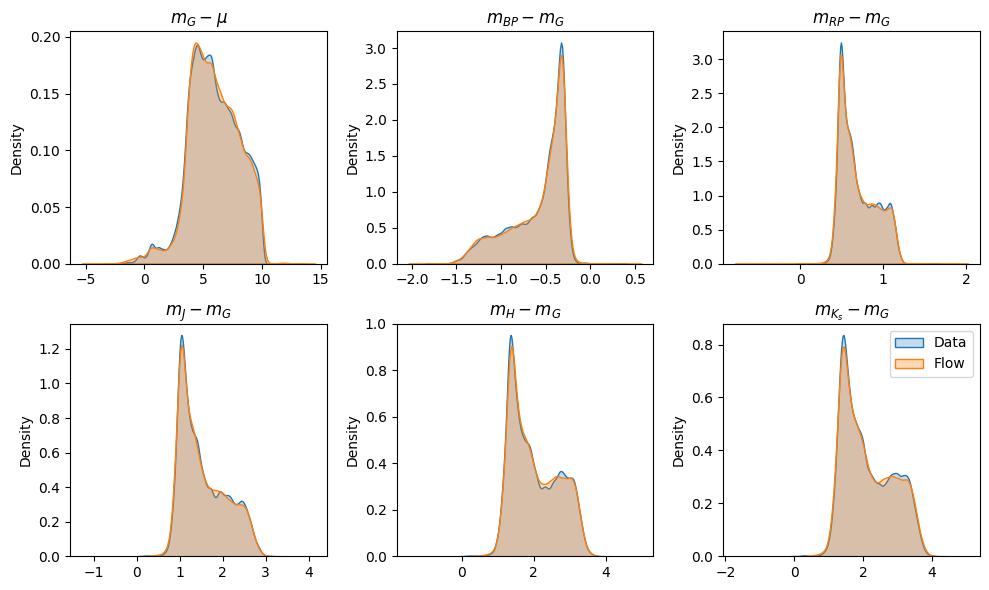

In [31]:
plt.figure(figsize=(18, 9))  # Adjust the figure size as needed for your paper layout
fig,axes=plt.subplots(2,3)
axes=axes.flatten()
fig.set_figheight(6)
fig.set_figwidth(10)
sn.kdeplot((nf.data[:,0]+nf.mean[0]),label='Data',ax=axes[0],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,0],label='Flow',ax=axes[0],fill=True,alpha=0.3)

sn.kdeplot(nf.data[:,1]+nf.mean[1],label='Data',ax=axes[1],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,1],label='Flow',ax=axes[1],fill=True,alpha=0.3)

sn.kdeplot(nf.data[:,2]+nf.mean[2],label='Data',ax=axes[2],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,2],label='Flow',ax=axes[2],fill=True,alpha=0.3)

sn.kdeplot(nf.data[:,3]+nf.mean[3],label='Data',ax=axes[3],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,3],label='Flow',ax=axes[3],fill=True,alpha=0.3)

sn.kdeplot(nf.data[:,4]+nf.mean[4],label='Data',ax=axes[4],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,4],label='Flow',ax=axes[4],fill=True,alpha=0.3)

sn.kdeplot(nf.data[:,5]+nf.mean[5],label='Data',ax=axes[5],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,5],label='Flow',ax=axes[5],fill=True,alpha=0.3)

#sn.kdeplot(nf.data[:,6]+nf.mean[6],label='Data',ax=axes[6],fill=True)  # Adjust the colormap as needed
#sn.kdeplot(x[:,6],label='Flow',ax=axes[6],fill=True,alpha=0.3)

#sn.kdeplot(nf.data[:,3]+nf.mean[3]-(nf.data[:,2]+nf.mean[2]),label='Data',ax=axes[7],fill=True)  # Adjust the colormap as needed
#sn.kdeplot(x[:,3]-x[:,2],label='Flow',ax=axes[7],fill=True,alpha=0.3)

#sn.kdeplot(nf.data[:,-1]+nf.mean[-1]+(nf.data[:,1]+nf.mean[1]),label='Data',ax=axes[8],fill=True)  # Adjust the colormap as needed
#sn.kdeplot(x[:,-1]+x[:,1],label='Flow',ax=axes[8],fill=True,alpha=0.3)

#axes[0].set_title('$\mu$', fontsize=12)  # Adjust the label and font size as needed
axes[0].set_title('$m_G-\mu$', fontsize=12)  # Adjust the label and font size as needed
axes[1].set_title('$m_{BP}-m_{G}$', fontsize=12)  # Adjust the label and font size as needed
axes[2].set_title('$m_{RP}-m_{G}$', fontsize=12)  # Adjust the label and font size as needed
axes[3].set_title('$m_{J}-m_{G}$', fontsize=12)  # Adjust the label and font size as needed
axes[4].set_title('$m_{H}-m_{G}$', fontsize=12)  # Adjust the label and font size as needed
axes[5].set_title('$m_{K_s}-m_{G}$', fontsize=12)  # Adjust the label and font size as needed
#axes[7].set_title('$m_{BP}-m_{RP}$', fontsize=12)  # Adjust the label and font size as needed
#axes[8].set_title('$m_{K}-\mu$', fontsize=12)  # Adjust the label and font size as needed

plt.legend()
# Adding a colorbar for better interpretation of the histogram
#cbar = plt.colorbar()
#cbar.set_label('N Stars', fontsize=12)  # Adjust the label and font size as needed
plt.tight_layout()
# Saving the plot
plt.savefig('/Users/mattocallaghan/XPNorm/Plots/par_compare.png', bbox_inches='tight')  # Adjust filename and DPI as needed
plt.savefig('/Users/mattocallaghan/XPNorm/Plots/par_compare.pdf', bbox_inches='tight')  # Adjust filename and DPI as needed

plt.show()

In [5]:
from src.Bayesian_NN import BayesianExtinction_Trainer

In [6]:
x=BayesianExtinction_Trainer().data_test+nf.mean

NameError: name 'nf' is not defined

In [ ]:
len(x)/len(nf.data)

0.23964839510936406

<Figure size 1800x900 with 0 Axes>

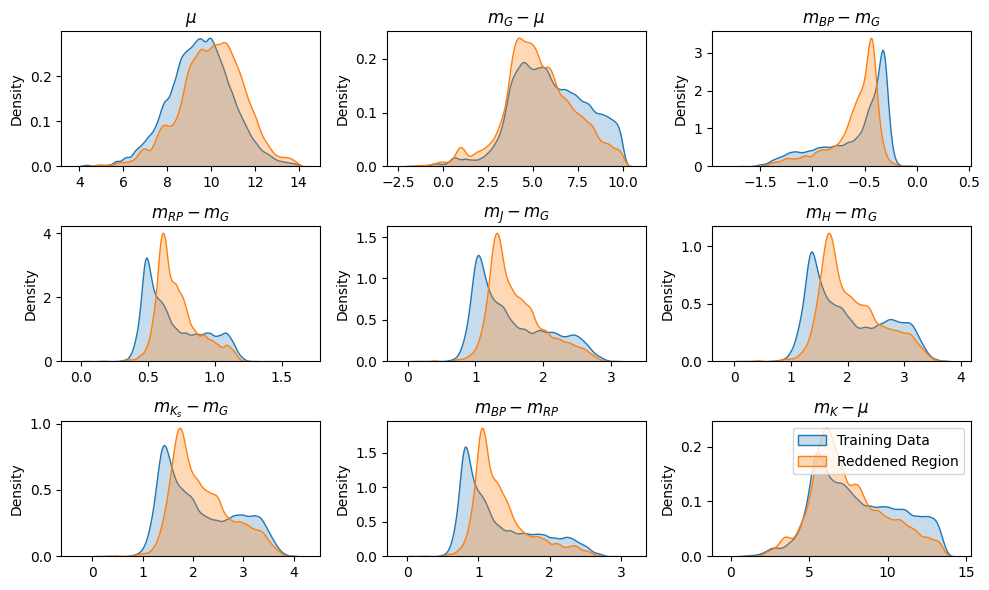

In [ ]:
plt.figure(figsize=(18, 9))  # Adjust the figure size as needed for your paper layout
fig,axes=plt.subplots(3,3)
axes=axes.flatten()
fig.set_figheight(6)
fig.set_figwidth(10)
sn.kdeplot((nf.data[:,0]+nf.mean[0]),label='Data',ax=axes[0],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,0],label='Flow',ax=axes[0],fill=True,alpha=0.3)

sn.kdeplot(nf.data[:,1]+nf.mean[1],label='Data',ax=axes[1],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,1],label='Flow',ax=axes[1],fill=True,alpha=0.3)

sn.kdeplot(nf.data[:,2]+nf.mean[2],label='Data',ax=axes[2],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,2],label='Flow',ax=axes[2],fill=True,alpha=0.3)

sn.kdeplot(nf.data[:,3]+nf.mean[3],label='Data',ax=axes[3],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,3],label='Flow',ax=axes[3],fill=True,alpha=0.3)

sn.kdeplot(nf.data[:,4]+nf.mean[4],label='Data',ax=axes[4],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,4],label='Flow',ax=axes[4],fill=True,alpha=0.3)

sn.kdeplot(nf.data[:,5]+nf.mean[5],label='Data',ax=axes[5],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,5],label='Flow',ax=axes[5],fill=True,alpha=0.3)

sn.kdeplot(nf.data[:,6]+nf.mean[6],label='Data',ax=axes[6],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,6],label='Flow',ax=axes[6],fill=True,alpha=0.3)

sn.kdeplot(nf.data[:,3]+nf.mean[3]-(nf.data[:,2]+nf.mean[2]),label='Data',ax=axes[7],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,3]-x[:,2],label='Flow',ax=axes[7],fill=True,alpha=0.3)

sn.kdeplot(nf.data[:,-1]+nf.mean[-1]+(nf.data[:,1]+nf.mean[1]),label='Training Data',ax=axes[8],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,-1]+x[:,1],label='Reddened Region',ax=axes[8],fill=True,alpha=0.3)

axes[0].set_title('$\mu$', fontsize=12)  # Adjust the label and font size as needed
axes[1].set_title('$m_G-\mu$', fontsize=12)  # Adjust the label and font size as needed
axes[2].set_title('$m_{BP}-m_{G}$', fontsize=12)  # Adjust the label and font size as needed
axes[3].set_title('$m_{RP}-m_{G}$', fontsize=12)  # Adjust the label and font size as needed
axes[4].set_title('$m_{J}-m_{G}$', fontsize=12)  # Adjust the label and font size as needed
axes[5].set_title('$m_{H}-m_{G}$', fontsize=12)  # Adjust the label and font size as needed
axes[6].set_title('$m_{K_s}-m_{G}$', fontsize=12)  # Adjust the label and font size as needed
axes[7].set_title('$m_{BP}-m_{RP}$', fontsize=12)  # Adjust the label and font size as needed
axes[8].set_title('$m_{K}-\mu$', fontsize=12)  # Adjust the label and font size as needed

plt.legend()
# Adding a colorbar for better interpretation of the histogram
#cbar = plt.colorbar()
#cbar.set_label('N Stars', fontsize=12)  # Adjust the label and font size as needed
plt.tight_layout()
# Saving the plot
plt.savefig('/Users/mattocallaghan/XPNorm/Plots/par_compare_test.png', bbox_inches='tight')  # Adjust filename and DPI as needed
plt.savefig('/Users/mattocallaghan/XPNorm/Plots/par_compare_test.pdf', bbox_inches='tight')  # Adjust filename and DPI as needed

plt.show()

<Axes: ylabel='Density'>

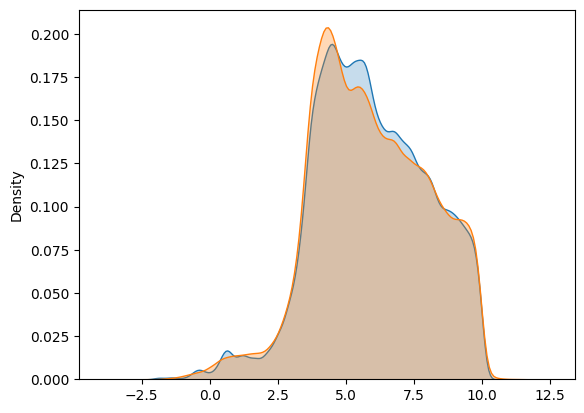

In [ ]:
i=3
sn.kdeplot((nf.data[:,0]+nf.mean[0]),label='Data',fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,0],label='Flow',fill=True,alpha=0.3)



/opt/homebrew/Caskroom/miniforge/base/envs/astro/lib/python3.8/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'c'
  cset = contour_func(
/opt/homebrew/Caskroom/miniforge/base/envs/astro/lib/python3.8/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'c'
  cset = contour_func(


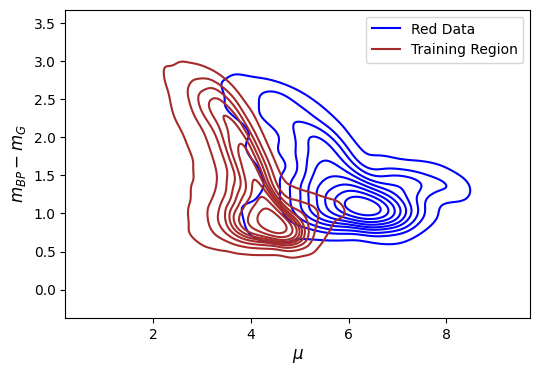

In [1]:
import numpy as np
import normflows as nf
from matplotlib import pyplot as plt
from tqdm import tqdm
import jax
import pandas as pd
import os
import matplotlib.pyplot as plt
from jax import grad,vmap
from jax import jacfwd, jacrev
from numpyro.infer import SVI, Trace_ELBO
import numpyro.optim as optim
from numpyro.infer import (
MCMC, NUTS, SVI, autoguide,
Trace_ELBO, Predictive, autoguide)
from torch import nn
import jax.numpy as jnp
import jax.random as jr
import matplotlib.pyplot as plt
from flowjax.bijections import RationalQuadraticSpline
from flowjax.distributions import Normal
from flowjax.flows import masked_autoregressive_flow
from src.jax_to_numpyro import distribution_to_numpyro
from src.NF_Cos_dist import JaxNormFlow
from numpyro.infer import MCMC, NUTS
import numpyro.distributions as dist
import numpyro
from jax import random, hessian

from numpyro.infer import MCMC, NUTS, SA, HMC
from numpyro import handlers
import equinox as eqx
import jax.numpy as jnp
from jax import random, jit

from astropy.coordinates import SkyCoord
import astropy.units as u


# Load saved parameters from PyTorch


# Compile JAX function
'''
HMC 

'''

############################################################################# 
###################### FILE LOCATIONS #######################################
#############################################################################

#directory for the pheonix spectra
data_file='/Users/mattocallaghan/XPNorm/Data/data_full_ps_1'
test_file='/Users/mattocallaghan/XPNorm/Data/data_noext_ps_1'
test_file='/Users/mattocallaghan/XPNorm/Data/data_black_ps_1'
#test_file='/Users/mattocallaghan/XPNorm/Data/data_red_1'
#test_file='/Users/mattocallaghan/XPNorm/Data/data_black_circle'

#test_file='/Users/mattocallaghan/XPNorm/Data/data_red_circle'
#test_file='/Users/mattocallaghan/XPNorm/Data/data_black_circle_20'
#test_file='/Users/mattocallaghan/XPNorm/Data/data_noext'

err_file='/Users/mattocallaghan/XPNorm/Data/err_black_ps_1'

#err_file='/Users/mattocallaghan/XPNorm/Data/err_noext_ps_1'





normalising_flow=JaxNormFlow()

dist_nf=distribution_to_numpyro(normalising_flow.flow)

        #self.data=pd.read_csv(csv_location)[['mu','phot_g_mean_mag','phot_bp_mean_mag','phot_rp_mean_mag','j_m','h_m','ks_m']].values

data_test=pd.read_csv(test_file)[['mu','phot_g_mean_mag','phot_bp_mean_mag','phot_rp_mean_mag','j_m','h_m','g_mean_psf_mag', 'r_mean_psf_mag', 'i_mean_psf_mag', 'z_mean_psf_mag', 'y_mean_psf_mag','ks_m']].values

data_err=pd.read_csv(err_file)[['mu_error','g_error','bp_error','rp_error','j_msigcom','h_msigcom','g_mean_psf_mag_error', 'r_mean_psf_mag_error', 'i_mean_psf_mag_error', 'z_mean_psf_mag_error', 'y_mean_psf_mag_error','ks_msigcom']].values


b=pd.read_csv(test_file)[['ra','dec']]
galactic_coord = SkyCoord(ra=b['ra'].values*u.degree, dec=b['dec'].values*u.degree, frame='icrs')
galactic_coord = galactic_coord.transform_to('galactic')
l=galactic_coord.l.value
b=galactic_coord.b.value

/opt/homebrew/Caskroom/miniforge/base/envs/flowjax/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
data_transform=jnp.array([
                                [1., 0., 0., 0., 0., 0.,0,0,0,0,0,0],
                                [-1., 0., 0., 0., 0.,0,0,0,0,0, 0.,1],
                                [0., 1., 0., 0., 0.,0,0,0,0,0, 0.,-1],
                                [0., 0., 1., 0.,0,0,0,0,0, 0., 0.,-1],
                                [0., 0., 0., 1., 0,0,0,0,0,0., 0.,-1],
                                [0., 0., 0., 0., 1., 0,0,0,0,0,0.,-1],
                                [0., 0., 0., 0., 0., 1,0,0,0,0,0,-1],
                                [0., 0., 0., 0., 0., 0,1,0,0,0,0,-1],
                                [0., 0., 0., 0., 0., 0,0,1,0,0,0,-1],
                                [0., 0., 0., 0., 0., 0,0,0,1,0,0,-1],
                                [0., 0., 0., 0., 0., 0,0,0,0,1,0,-1],
                                [0., 0., 0., 0., 0., 0,0,0,0,0,1,-1]])
        
data=jnp.einsum('ij,bj->bi',jnp.array(data_transform),jnp.array(data_test))
error=jnp.stack([jnp.diag(arr)**2 for arr in data_err])
        # DOES THIS NEED TOBE ERR SQUARED
error=error.at[:,0,0].set(error[:,0,0]*(jnp.abs(jnp.sin(jnp.radians(b))**2)))

        #self.error=jnp.stack([jnp.eye(7) for arr in self.data_err])
error=(jnp.einsum('ik,bkj->bij',(jnp.array(data_transform)),error))

error=(jnp.einsum('bik,kj->bij',error,jnp.array(data_transform).transpose()))
        #self.data=self.data[(self.data[:,1]<10)*(self.data[:,1]>-2)]
        #self.data=self.data[(self.data[:,0]<20)]#*(self.data[:,0]>2)]
distance=10**((data[:,0]+5)/5)
data = data.at[:,0].set(data[:,0]*jnp.abs(jnp.sin(jnp.radians(b))))
mean=jnp.mean(data,axis=0)
std=jnp.std(data,axis=0)
data=(data-normalising_flow.mean)

In [5]:
import torch

In [6]:


saved_params = torch.load('/Users/mattocallaghan/XPNorm/Data/model_extinction')
w1 = jnp.array(saved_params['fc1.weight'].T)  # Transpose weight matrix
b1 = jnp.array(saved_params['fc1.bias'])
w2 = jnp.array(saved_params['fc3.weight'].T)  # Transpose weight matrix
b2 = jnp.array(saved_params['fc3.bias'])
nn_params = (w1, b1, w2, b2)



def extinction_neural(x):
    w1, b1, w2, b2 = nn_params
    x = jnp.dot(x, w1) + b1
    x = jnp.maximum(0, x)
    x = jnp.dot(x, w2) + b2
    return x

In [7]:
import jax.random as jr
samples=dist_nf.sample(jr.PRNGKey(0),sample_shape=(15000,))

In [9]:

data_file='/Users/mattocallaghan/XPNorm/Data/exts.npy'
data_file_2='/Users/mattocallaghan/XPNorm/Data/vals.npy'

teff=np.arange(3500,10000,100)
logg=np.arange(0,5,0.15)
feh=np.arange(-3,0.5,0.5)
#Rv=np.arange(1,5,0.2)
av=np.arange(0.001,5,0.1)

mesh=np.meshgrid(teff,logg,feh,av)
teff=mesh[0].flatten()[:,None]
logg=mesh[1].flatten()[:,None]
feh=mesh[2].flatten()[:,None]
av=mesh[3].flatten()[:,None]
columns = ['teff','feh','logg','av',"a_Gaia_G_EDR3", "a_Gaia_BP_EDR3", 'a_Gaia_RP_EDR3','a_2MASS_J','a_2MASS_H','a_2MASS_Ks','a_WISE_W1','a_WISE_W2','a_PS_g','a_PS_i','a_PS_r','a_PS_y','a_PS_z',"Gaia_G_EDR3", "Gaia_BP_EDR3", 'Gaia_RP_EDR3','2MASS_J','2MASS_H','2MASS_Ks','WISE_W1','WISE_W2','PS_g','PS_i','PS_r','PS_y','PS_z'] #add wise on later.
data_extinction=pd.DataFrame(np.concatenate((teff,logg,feh,av,np.load(data_file),np.load(data_file_2)),1),columns=columns)
data_extinction=data_extinction[['av',"Gaia_G_EDR3", "Gaia_BP_EDR3", 'Gaia_RP_EDR3','2MASS_J','2MASS_H','2MASS_Ks','PS_g','PS_i','PS_r','PS_y','PS_z',"a_Gaia_G_EDR3", "a_Gaia_BP_EDR3", 'a_Gaia_RP_EDR3','a_2MASS_J','a_2MASS_H','a_2MASS_Ks','a_PS_g','a_PS_i','a_PS_r','a_PS_y','a_PS_z']].dropna()

data_extinction[["k_Gaia_G_EDR3", "k_Gaia_BP_EDR3", 'k_Gaia_RP_EDR3','k_2MASS_J','k_2MASS_H','k_2MASS_Ks','k_PS_g','k_PS_i','k_PS_r','k_PS_y','k_PS_z']]=(data_extinction[["a_Gaia_G_EDR3", "a_Gaia_BP_EDR3", 'a_Gaia_RP_EDR3','a_2MASS_J','a_2MASS_H','a_2MASS_Ks','a_PS_g','a_PS_i','a_PS_r','a_PS_y','a_PS_z']].values)/data_extinction['av'].values[:,None]
data_extinction['GK']=data_extinction['Gaia_G_EDR3']-data_extinction['2MASS_Ks']
data_extinction['RPK']=data_extinction['Gaia_RP_EDR3']-data_extinction['2MASS_Ks']
data_extinction=data_extinction[['av',"GK","RPK","k_Gaia_G_EDR3", "k_Gaia_BP_EDR3", 'k_Gaia_RP_EDR3','k_2MASS_J','k_2MASS_H','k_2MASS_Ks','k_PS_g','k_PS_i','k_PS_r','k_PS_y','k_PS_z']].dropna().values


In [15]:


a0=jnp.array([0.05])*jnp.ones_like(samples[:,0])
x=samples
#choosing specific inputs and outputs
extinction_input=jnp.concatenate((a0[:,None],(x+normalising_flow.mean)[:,jnp.array([1,3])]),1) #picking out gk and rbk
extinction_input=(extinction_input-jnp.array(data_extinction.mean(0)[[0,1,2]]))/jnp.array(data_extinction.std(0)[[0,1,2]])
nn_output=extinction_neural(extinction_input) # i got my signs wrong when building the NN
indices_order=[0,1,2,3,4,6,8,7,10,9,5] #because i didnt match the extinction law correctly
indices_order_mean_std=[0+3,1+3,2+3,3+3,4+3,6+3,8+3,7+3,10+3,9+3,5+3]
extinction_vector=jax.nn.relu(nn_output[:,jnp.array(indices_order)]*jnp.array(data_extinction.std(0)[indices_order_mean_std])+jnp.array(data_extinction.mean(0)[indices_order_mean_std]))
